<a href="https://colab.research.google.com/github/arbi11/CEFC-2022/blob/main/Rescaled_Bx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from time import time

Good to know what version of tensorflow we're using...

In [ ]:
print(tf.version.VERSION)

2.8.2


# Data Acquisition and Cleanup

In [ ]:
for (name, (train_url, test_url)) in {
    'M6': ('https://docs.google.com/spreadsheets/d/e/2PACX-1vStmjk37Gyxo04Jh_cR0yu-My4Y2KfiXRzNqI9iztS1V5ezxepehbmQOYSNDsao3Sxrksxr5kH0NqBg/pub?gid=405256803&single=true&output=csv',
            'https://docs.google.com/spreadsheets/d/e/2PACX-1vTCx2G0k-SUnmQxg_9TuW-o-D5Z44itWiciuHIkbGXxHPjEPBxbRVP2TMdN7GxRQtkMkkUBUv_IrLXr/pub?gid=1464939435&single=true&output=csv'),
    'M19': ('https://docs.google.com/spreadsheets/d/e/2PACX-1vTX1O03TCJYomYg1QU6SpGi-OhR_V3Kkx1Xkc2JUpaWaLlztDSLMn6eFXyFmaVZrmRIJjGoqY5LkENP/pub?gid=1103714291&single=true&output=csv',
            'https://docs.google.com/spreadsheets/d/e/2PACX-1vQQFzZz0My7iSpzHtl2K2m-2oBCHT--nqaXZiPxct4sJO2CPQWiRD6HRA8AeJHHQkY6bcu9lxatiLaP/pub?gid=1992106649&single=true&output=csv'),
    'M27': ('https://docs.google.com/spreadsheets/d/e/2PACX-1vRdXKEhlJTJJ51CppTioNYQRU7Ehq1ENVg3AeUx62jmkCe8g1miMc7yjcHmqfWyjg3bfJtRoXN77Eb-/pub?gid=635614041&single=true&output=csv',
            'https://docs.google.com/spreadsheets/d/e/2PACX-1vSMECgV6ErVI3a0_8tK6ymGVtvmff_ADVvJ6THlVTv0sL2jn3KAFcTuU04zw2LCmMxPFdY1lEzbi_aB/pub?gid=1533844294&single=true&output=csv'),
    '20PNF1500': ('https://docs.google.com/spreadsheets/d/e/2PACX-1vTBWwGhiUQBhBTGz4DZqAwDaeVxbwxWJDJZpvWQLesTYLDD8ehmMC7OENkgzyohLrCxtcbEKvaABk4Y/pub?gid=1807288876&single=true&output=csv',
                  'https://docs.google.com/spreadsheets/d/e/2PACX-1vSMlA32y9eSewKWs5j3R6FVi5-eQcUhgCzpiLUXlF8adWgScy0lw5-imD6GM0SA_-sHVM8VCtIpYhSP/pub?gid=222833859&single=true&output=csv'),
  }.items():
  print(name)

  # *  Get rid of the 5 useless rows at the beginning of each file
  # *  Normalize the column names to 't', 'Hx', 'Bx', 'Hy', 'By', 'Hz', 'Bz'
  df = pd.read_csv(train_url, skiprows=5, usecols=range(1, 8))
  df.to_csv(f"{name}_train.csv", index=False)
  print(f"  train set: {df.shape}")

  df = pd.read_csv(test_url, skiprows=5, usecols=range(1, 8))
  df.rename(columns={'H x': 'Hx', 'B x': 'Bx', 'H y': 'Hy', 'B y': 'By', 'H z': 'Hz', 'B z': 'Bz'}, inplace=True)
  df.to_csv(f"{name}_test.csv", index=False)
  print(f"  test set:  {df.shape}")

print("\nDone")

M6
  train set: (2001, 7)
  test set:  (11766, 7)
M19
  train set: (2001, 7)
  test set:  (1178, 7)
M27
  train set: (2001, 7)
  test set:  (1178, 7)
20PNF1500
  train set: (2001, 7)
  test set:  (11766, 7)

Done


And the M6 dataset with 20000 data points...

In [ ]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vR4v2LZFBH-tn1nSFUkL8M3cOZSh1I1jQzXsoLyGtdt--hAgyfEYYk087pFB7iatP7FvJsdM9fvfzAG/pub?gid=1926006206&single=true&output=csv',
                 skiprows=5, usecols=range(1, 8))
df.to_csv("M6_train20000.csv", index=False)
print(f"M6 (20000 data point version): {df.shape}")
del df

M6 (20000 data point version): (20001, 7)


# Data Exploration and Visualization

## M6 (2000 data point version)

In [ ]:
df = pd.read_csv('./M6_train.csv')
df

t         Hx        Bx            Hy            By  Hz  \
0       0.0   0.000000  0.000000  0.000000e+00  0.000000e+00   0   
1       0.1   0.005460  0.000075 -1.190000e-17 -2.860000e-17   0   
2       0.2   0.024100  0.000329  1.640000e-14  2.480000e-16   0   
3       0.3   0.042700  0.000584  1.820000e-12 -2.040000e-15   0   
4       0.4   0.061300  0.000839 -2.310000e-14 -3.810000e-14   0   
...     ...        ...       ...           ...           ...  ..   
1996  199.6  26.553186 -0.238842 -4.110000e-10 -2.940000e-11   0   
1997  199.7  27.205196 -0.188133 -3.350000e-10 -2.880000e-11   0   
1998  199.8  27.729051 -0.137423 -2.390000e-10 -1.390000e-11   0   
1999  199.9  28.159743 -0.086700  1.470000e-10 -1.010000e-11   0   
2000  200.0  28.529760 -0.036000  1.970000e-10 -1.290000e-11   0   

                 Bz  
0      0.000000e+00  
1     3.172737e-315  
2     3.172737e-315  
3     3.172737e-315  
4     3.172737e-315  
...             ...  
1996  3.172737e-315  
1997  3.172737e-315  
1998  3.172737e-315  
1999  3.172737e-315  
2000  3.172737e-315  

[2001 rows x 7 columns]

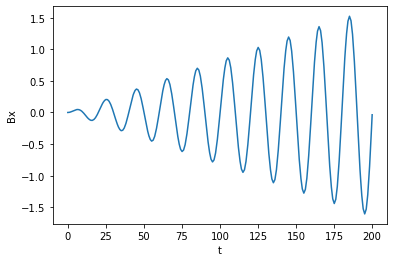

In [ ]:
plt.plot(df['t'], df['Bx'], '-')
plt.xlabel('t')
plt.ylabel('Bx')
plt.show()

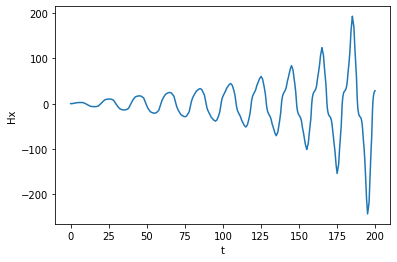

In [ ]:
plt.plot(df['t'], df['Hx'])
plt.xlabel('t')
plt.ylabel('Hx')
plt.show()

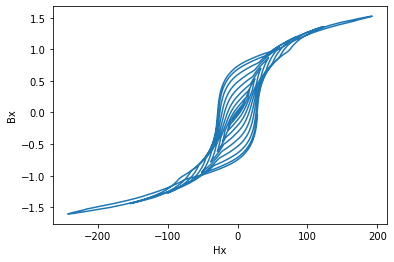

In [ ]:
plt.plot(df['Hx'], df['Bx'])
plt.xlabel('Hx')
plt.ylabel('Bx')
plt.show()

## M6 (20000 data point version)

In [ ]:
df = pd.read_csv('./M6_train20000.csv')
df

t        Hx        Bx            Hy            By  Hz   Bz
0        0.00  0.000000  0.000000  0.000000e+00  0.000000e+00   0  0.0
1        0.01  0.000546  0.000007 -1.460000e-18  2.090000e-18   0  0.0
2        0.02  0.002410  0.000033  1.020000e-15  3.830000e-17   0  0.0
3        0.03  0.004280  0.000058  5.400000e-15  1.540000e-16   0  0.0
4        0.04  0.006140  0.000084  6.350000e-15  7.590000e-17   0  0.0
...       ...       ...       ...           ...           ...  ..  ...
19996  199.96  7.536977 -0.023900 -1.470000e-09 -6.500000e-11   0  0.0
19997  199.97  7.799354 -0.018800 -1.430000e-09 -6.470000e-11   0  0.0
19998  199.98  8.057725 -0.013800 -1.400000e-09 -6.450000e-11   0  0.0
19999  199.99  8.312216 -0.008700 -1.370000e-09 -6.480000e-11   0  0.0
20000  200.00  8.562948 -0.003630 -1.360000e-09 -6.500000e-11   0  0.0

[20001 rows x 7 columns]

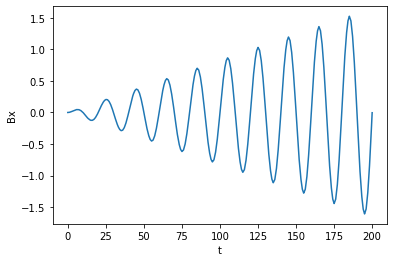

In [ ]:
plt.plot(df['t'], df['Bx'], '-')
plt.xlabel('t')
plt.ylabel('Bx')
plt.show()

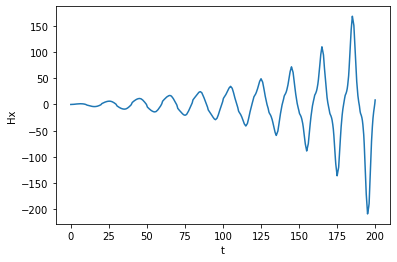

In [ ]:
plt.plot(df['t'], df['Hx'])
plt.xlabel('t')
plt.ylabel('Hx')
plt.show()

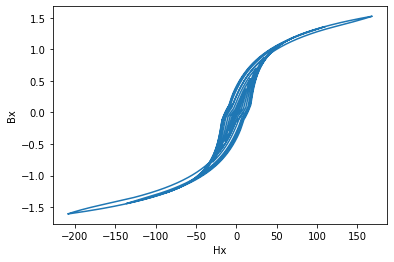

In [ ]:
plt.plot(df['Hx'], df['Bx'])
plt.xlabel('Hx')
plt.ylabel('Bx')
plt.show()

## M19

In [ ]:
df = pd.read_csv('./M19_train.csv')
df

t         Hx        Bx            Hy            By  Hz  \
0       0.0   0.000000  0.000000  0.000000e+00  0.000000e+00   0   
1       0.1   0.016100  0.000075  4.930000e-18 -4.960000e-18   0   
2       0.2   0.070900  0.000329  1.070000e-14  6.050000e-16   0   
3       0.3   0.125582  0.000584 -6.320000e-12 -1.900000e-14   0   
4       0.4   0.180231  0.000838 -7.490000e-13  7.610000e-15   0   
...     ...        ...       ...           ...           ...  ..   
1996  199.6  54.128872 -0.238981 -4.310000e-10 -1.650000e-11   0   
1997  199.7  55.785869 -0.188277 -6.320000e-10 -1.970000e-11   0   
1998  199.8  56.959727 -0.137570 -7.640000e-10 -1.890000e-11   0   
1999  199.9  57.788775 -0.086900 -6.110000e-10 -1.910000e-11   0   
2000  200.0  58.398845 -0.036200 -4.680000e-10 -1.910000e-11   0   

                 Bz  
0     3.234392e-317  
1     3.231985e-315  
2     3.231985e-315  
3     3.231985e-315  
4     3.231985e-315  
...             ...  
1996  3.231985e-315  
1997  3.231985e-315  
1998  3.231985e-315  
1999  3.231985e-315  
2000  3.231985e-315  

[2001 rows x 7 columns]

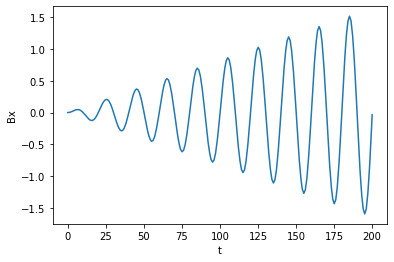

In [ ]:
plt.plot(df['t'], df['Bx'])
plt.xlabel('t')
plt.ylabel('Bx')
plt.show()

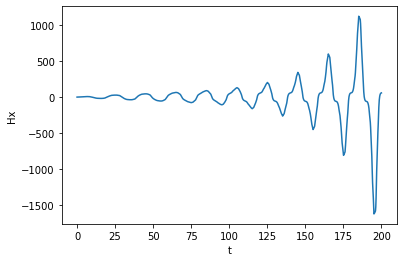

In [ ]:
plt.plot(df['t'], df['Hx'])
plt.xlabel('t')
plt.ylabel('Hx')
plt.show()

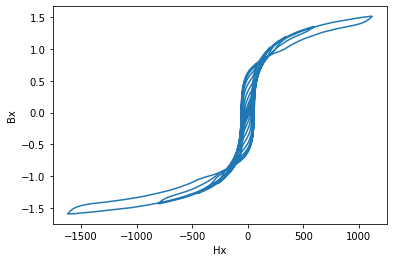

In [ ]:
plt.plot(df['Hx'], df['Bx'])
plt.xlabel('Hx')
plt.ylabel('Bx')
plt.show()

## M27

In [ ]:
df = pd.read_csv('./M27_train.csv')
df

t         Hx        Bx            Hy            By  Hz  \
0       0.0   0.000000  0.000000  0.000000e+00  0.000000e+00   0   
1       0.1   0.029800  0.000074  5.050000e-17 -1.030000e-17   0   
2       0.2   0.131281  0.000329 -1.940000e-14 -1.540000e-15   0   
3       0.3   0.232548  0.000583  2.660000e-12  5.720000e-16   0   
4       0.4   0.333579  0.000837  1.590000e-12 -3.440000e-16   0   
...     ...        ...       ...           ...           ...  ..   
1996  199.6  83.234273 -0.239127  1.010000e-09  1.200000e-11   0   
1997  199.7  84.088881 -0.188419  2.940000e-10  1.080000e-11   0   
1998  199.8  84.683009 -0.137710  4.460000e-10  1.200000e-11   0   
1999  199.9  85.103368 -0.087000  2.890000e-10  1.200000e-11   0   
2000  200.0  85.431758 -0.036300  2.650000e-10  1.230000e-11   0   

                 Bz  
0      0.000000e+00  
1     3.173707e-315  
2     3.173707e-315  
3     3.173707e-315  
4     3.173707e-315  
...             ...  
1996  3.173707e-315  
1997  3.173707e-315  
1998  3.173707e-315  
1999  3.173707e-315  
2000  3.173707e-315  

[2001 rows x 7 columns]

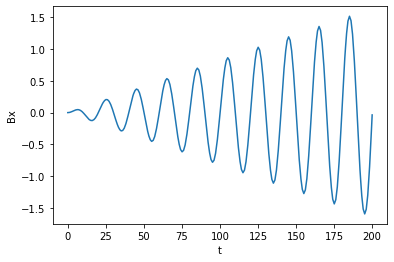

In [ ]:
plt.plot(df['t'], df['Bx'], '-')
plt.xlabel('t')
plt.ylabel('Bx')
plt.show()

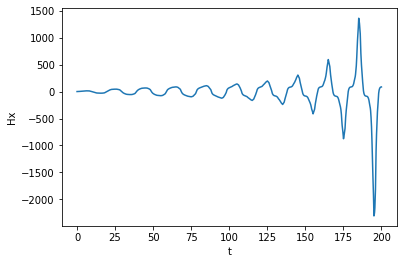

In [ ]:
plt.plot(df['t'], df['Hx'])
plt.xlabel('t')
plt.ylabel('Hx')
plt.show()

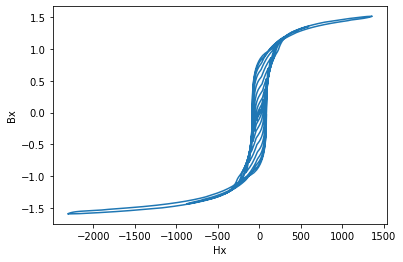

In [ ]:
plt.plot(df['Hx'], df['Bx'])
plt.xlabel('Hx')
plt.ylabel('Bx')
plt.show()

## 20PNF1500

In [ ]:
df = pd.read_csv('./20PNF1500_train.csv')
df

t         Hx        Bx            Hy            By  Hz  \
0       0.0   0.000000  0.000000  0.000000e+00  0.000000e+00   0   
1       0.1   0.008970  0.000075  2.070000e-18  2.190000e-17   0   
2       0.2   0.039600  0.000329 -2.010000e-14 -8.070000e-16   0   
3       0.3   0.070200  0.000584 -1.240000e-12  1.240000e-14   0   
4       0.4   0.100677  0.000839  2.140000e-12  3.780000e-14   0   
...     ...        ...       ...           ...           ...  ..   
1996  199.6  24.903787 -0.238834 -7.050000e-10 -1.320000e-11   0   
1997  199.7  26.197892 -0.188128 -7.090000e-10 -1.350000e-11   0   
1998  199.8  27.139616 -0.137420 -6.050000e-10 -9.640000e-12   0   
1999  199.9  27.827180 -0.086700 -1.980000e-10 -8.510000e-12   0   
2000  200.0  28.348415 -0.036000 -2.660000e-10 -1.240000e-11   0   

                 Bz  
0      0.000000e+00  
1     3.332685e-315  
2     3.332685e-315  
3     3.332685e-315  
4     3.332685e-315  
...             ...  
1996  3.332685e-315  
1997  3.332685e-315  
1998  3.332685e-315  
1999  3.332685e-315  
2000  3.332685e-315  

[2001 rows x 7 columns]

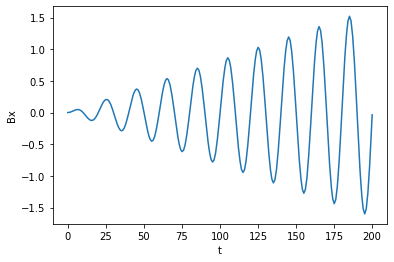

In [ ]:
plt.plot(df['t'], df['Bx'], '-')
plt.xlabel('t')
plt.ylabel('Bx')
plt.show()

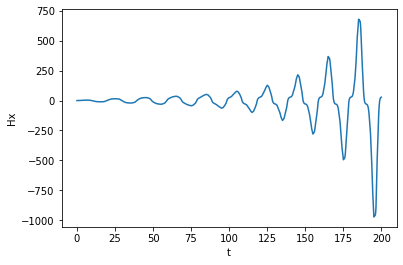

In [ ]:
plt.plot(df['t'], df['Hx'])
plt.xlabel('t')
plt.ylabel('Hx')
plt.show()

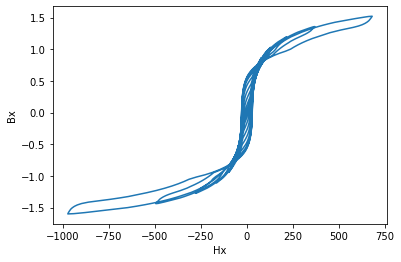

In [ ]:
plt.plot(df['Hx'], df['Bx'])
plt.xlabel('Hx')
plt.ylabel('Bx')
plt.show()

# Training and Testing Sets

In [ ]:
def generate_timesteps(df, window=1):
  assert window > 0

  y = np.zeros((len(df), window, 1))
  x = np.zeros((len(df), window, 2))

  for w in range(window):
    y[w:, window - w - 1, 0] = df['Bx'][:len(df) - w]

  for w in range(window):
    x[w:, window - w - 1, 0] = df['Hx'][:len(df) - w]

  for w in range(window):
    x[w + 1:, window - w - 1, 1] = df['Bx'][:len(df) - w - 1]

  return (x, y[:, -1, :])

## M6 (2000 data point version)

In [ ]:
(M6_train_X, M6_train_Y) = generate_timesteps(pd.read_csv('./M6_train.csv'), window=30)
(M6_test_X, M6_test_Y)   = generate_timesteps(pd.read_csv('./M6_test.csv'), window=30)

print("Training Set")
print(f"  X: {M6_train_X.shape}")
print(f"  Y: {M6_train_Y.shape}")

print("Testing Set")
print(f"  X: {M6_test_X.shape}")
print(f"  Y: {M6_test_Y.shape}")

Training Set
  X: (2001, 30, 2)
  Y: (2001, 1)
Testing Set
  X: (11766, 30, 2)
  Y: (11766, 1)


## M6 (20000 data point version)

In [ ]:
(M6_20000_train_X, M6_20000_train_Y) = generate_timesteps(pd.read_csv('./M6_train20000.csv'), window=30)

print("Training Set")
print(f"  X: {M6_20000_train_X.shape}")
print(f"  Y: {M6_20000_train_Y.shape}")

Training Set
  X: (20001, 30, 2)
  Y: (20001, 1)


## M19

In [ ]:
(M19_train_X, M19_train_Y) = generate_timesteps(pd.read_csv('./M19_train.csv'), window=30)
(M19_test_X, M19_test_Y)   = generate_timesteps(pd.read_csv('./M19_test.csv'), window=30)

print("Training Set")
print(f"  X: {M19_train_X.shape}")
print(f"  Y: {M19_train_Y.shape}")

print("Testing Set")
print(f"  X: {M19_test_X.shape}")
print(f"  Y: {M19_test_Y.shape}")

Training Set
  X: (2001, 30, 2)
  Y: (2001, 1)
Testing Set
  X: (1178, 30, 2)
  Y: (1178, 1)


## M27

In [ ]:
(M27_train_X, M27_train_Y) = generate_timesteps(pd.read_csv('./M27_train.csv'), window=30)
(M27_test_X, M27_test_Y)   = generate_timesteps(pd.read_csv('./M27_test.csv'), window=30)

print("Training Set")
print(f"  X: {M27_train_X.shape}")
print(f"  Y: {M27_train_Y.shape}")

print("Testing Set")
print(f"  X: {M27_test_X.shape}")
print(f"  Y: {M27_test_Y.shape}")

Training Set
  X: (2001, 30, 2)
  Y: (2001, 1)
Testing Set
  X: (1178, 30, 2)
  Y: (1178, 1)


## 20PNF1500

In [ ]:
(_20PNF1500_train_X, _20PNF1500_train_Y) = generate_timesteps(pd.read_csv('./20PNF1500_train.csv'), window=30)
(_20PNF1500_test_X, _20PNF1500_test_Y)   = generate_timesteps(pd.read_csv('./20PNF1500_test.csv'), window=30)

print("Training Set")
print(f"  X: {_20PNF1500_train_X.shape}")
print(f"  Y: {_20PNF1500_train_Y.shape}")

print("Testing Set")
print(f"  X: {_20PNF1500_test_X.shape}")
print(f"  Y: {_20PNF1500_test_Y.shape}")

Training Set
  X: (2001, 30, 2)
  Y: (2001, 1)
Testing Set
  X: (11766, 30, 2)
  Y: (11766, 1)


# ML Models

## Temporal Convolution Network (CNV4)

In [ ]:
def new_model_cnv4():
  input = tf.keras.layers.Input(shape=(7, 2))

  x = input
  for i in range(4):
    x = tf.keras.layers.Conv1D(128, kernel_size=(4,), padding='causal', activation='swish')(x)
    y = tf.keras.layers.Conv1D(128, kernel_size=(4,), padding='causal', activation='swish')(x)
    x = tf.keras.layers.Add()([x, y])

  x = tf.keras.layers.Conv1D(128, kernel_size=(3,), activation='swish')(x)
  x = tf.keras.layers.Dense(128, activation='swish')(x)

  x = tf.keras.layers.Conv1D(128, kernel_size=(3,), activation='swish')(x)
  x = tf.keras.layers.Dense(128, activation='swish')(x)

  x = tf.keras.layers.Conv1D(128, kernel_size=(3,), activation='swish')(x)
  x = tf.keras.layers.Dense(128, activation='swish')(x)

  x = tf.keras.layers.Dense(1, activation='linear')(x)
  x = tf.keras.layers.Flatten()(x)

  model = tf.keras.Model(inputs=input, outputs=x)
  return model

new_model_cnv4().summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 7, 2)]       0           []                               
                                                                                                  
 conv1d_33 (Conv1D)             (None, 7, 128)       1152        ['input_8[0][0]']                
                                                                                                  
 conv1d_34 (Conv1D)             (None, 7, 128)       65664       ['conv1d_33[0][0]']              
                                                                                                  
 add_12 (Add)                   (None, 7, 128)       0           ['conv1d_33[0][0]',              
                                                                  'conv1d_34[0][0]']        

## LSTM

In [ ]:
def new_model_lstm():
  return tf.keras.Sequential([
    tf.keras.layers.LSTM(400, input_shape=(None, 2), return_sequences=True),
    tf.keras.layers.LSTM(400),
    tf.keras.layers.Dense(1),
  ])

new_model_lstm().summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, None, 400)         644800    
                                                                 
 lstm_7 (LSTM)               (None, 400)               1281600   
                                                                 
 dense_19 (Dense)            (None, 1)                 401       
                                                                 
Total params: 1,926,801
Trainable params: 1,926,801
Non-trainable params: 0
_________________________________________________________________


## GRU1

In [ ]:
def new_model_gru1():
  input = tf.keras.Input(shape=(None, 2))

  x = tf.keras.layers.GRU(32, return_sequences=True)(input)
  x = tf.keras.layers.GRU(1)(x)

  model = tf.keras.Model(input, x)
  return model

new_model_gru1().summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, None, 2)]         0         
                                                                 
 gru_8 (GRU)                 (None, None, 32)          3456      
                                                                 
 gru_9 (GRU)                 (None, 1)                 105       
                                                                 
Total params: 3,561
Trainable params: 3,561
Non-trainable params: 0
_________________________________________________________________


# Model Utilities

In [ ]:
def compile_and_fit(model, train_X, train_Y,
                    epochs=1000,
                    patience=10,
                    min_delta=0,
                    batch_size=50,
                    seed=9763):
  if seed is not None:
    np.random.seed(seed)
    tf.random.set_seed(seed)

  model.compile(loss='mse', optimizer='adam')
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                                    mode='auto',
                                                    verbose=0,
                                                    min_delta=min_delta,
                                                    patience=patience)
  
  # sneaky normalization
  train_X = np.array(train_X, copy=True)
  train_Y = np.array(train_Y, copy=True)
  train_X[:, :, 1] /= 1.5
  train_Y /= 1.5
  np.clip(train_Y, -1, 1, out=train_Y)

  return model.fit(train_X, train_Y,
                   epochs=epochs,
                   batch_size=batch_size,
                   callbacks=[early_stopping])

In [ ]:
def plot_train_stats(history):
  plt.plot(history.history['loss'])
  plt.title('Training Loss')
  plt.xlabel('Epoch')
  plt.ylabel('MSE')
  plt.show()

In [ ]:
def plot_predictions(pred, actual, **kwargs):
  (fig, ax) = plt.subplots(2, sharex=True, **kwargs)

  ax[0].plot(actual, label='expected')
  ax[0].plot(pred, label='prediction')
  ax[0].set_ylabel('Bx')
  ax[0].legend()

  ax[1].plot(np.abs(actual - pred))
  ax[1].set_ylabel('delta')
  ax[1].grid()

  plt.xlabel('t')
  plt.show()

  print(f"MSE: {np.square(actual - pred).mean()}")

In [ ]:
def inference_loop(model, data_X):
  data_X = np.array(data_X, copy=True)

  # sneaky normalization
  data_X[:, :, 1] /= 1.5

  y = np.empty(len(data_X))
  print(f"Start inference loop on {len(data_X)} samples...", end="")
  start = time()
  for i in range(len(data_X) - 1):
    y[i] = model.predict(data_X[i, None]).flatten()[-1]

    data_X[i + 1, :-1, 1] = data_X[i, 1:, 1]
    data_X[i + 1, -1, 1] = y[i]

  i = len(data_X) - 1
  y[i] = model.predict(data_X[i, None]).flatten()[-1]
  end = time()
  print(f" DONE after {end - start}s")
  return y.reshape((-1, 1)) * 1.5   # undo Bx normalization

# Model Performance

## CNV4

Note that CNV4 uses 7 timesteps while the data has 30. Need to only keep the last 7.

### M6 (2000 data point version)

Epoch 1/1000
41/41 [==============================] - 2s 28ms/step - loss: 0.0313
Epoch 2/1000
41/41 [==============================] - 1s 29ms/step - loss: 0.0074
Epoch 3/1000
41/41 [==============================] - 1s 29ms/step - loss: 0.0066
Epoch 4/1000
41/41 [==============================] - 1s 29ms/step - loss: 0.0108
Epoch 5/1000
41/41 [==============================] - 1s 29ms/step - loss: 0.0043
Epoch 6/1000
41/41 [==============================] - 1s 28ms/step - loss: 0.0036
Epoch 7/1000
41/41 [==============================] - 1s 29ms/step - loss: 0.0020
Epoch 8/1000
41/41 [==============================] - 1s 29ms/step - loss: 0.0016
Epoch 9/1000
41/41 [==============================] - 1s 29ms/step - loss: 0.0033
Epoch 10/1000
41/41 [==============================] - 1s 28ms/step - loss: 0.0012
Epoch 11/1000
41/41 [==============================] - 1s 29ms/step - loss: 7.9262e-04
Epoch 12/1000
41/41 [==============================] - 1s 29ms/step - loss: 5.5028e-04
Epoch

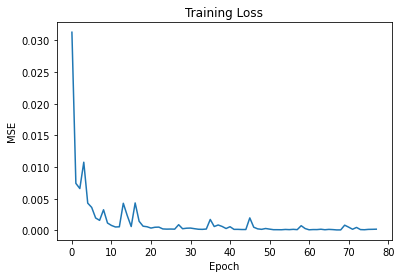

In [ ]:
model = new_model_cnv4()
history = compile_and_fit(model, M6_train_X[:, -7:, :], M6_train_Y)
model.save('./Model_CNV4_M6')
plot_train_stats(history)
del model, history

Start inference loop on 2001 samples... DONE after 66.64048027992249s


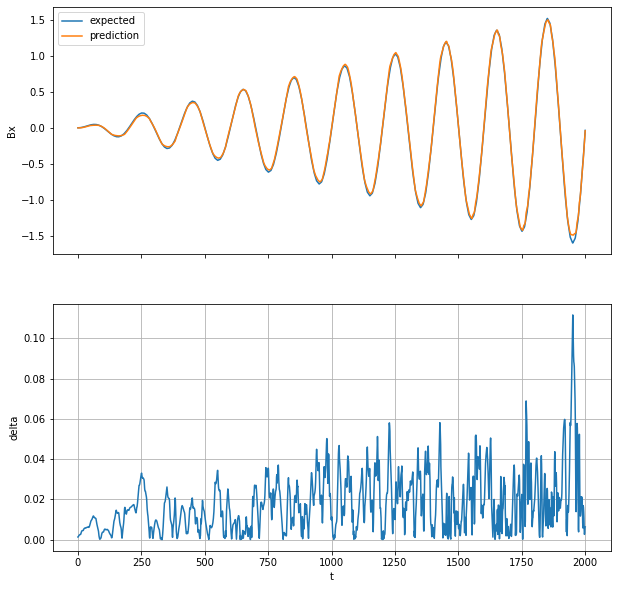

MSE: 0.0005243476447435074


In [ ]:
model = tf.keras.models.load_model('./Model_CNV4_M6')
pred = inference_loop(model, M6_train_X[:, -7:, :])
del model

plot_predictions(pred, M6_train_Y, figsize=(10, 10))

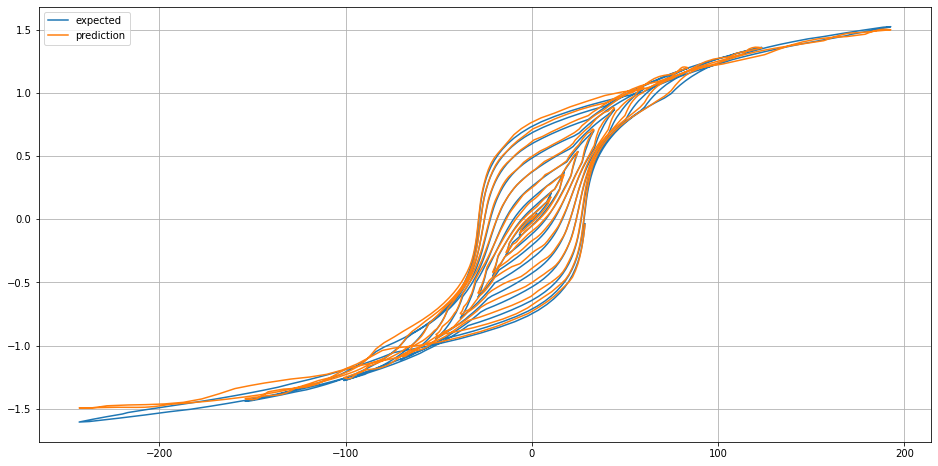

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(M6_train_X[:, -1, 0], M6_train_Y, label='expected')
plt.plot(M6_train_X[:, -1, 0], pred, label='prediction')
plt.grid()
plt.legend()
plt.show()

Start inference loop on 11766 samples... DONE after 394.36048007011414s


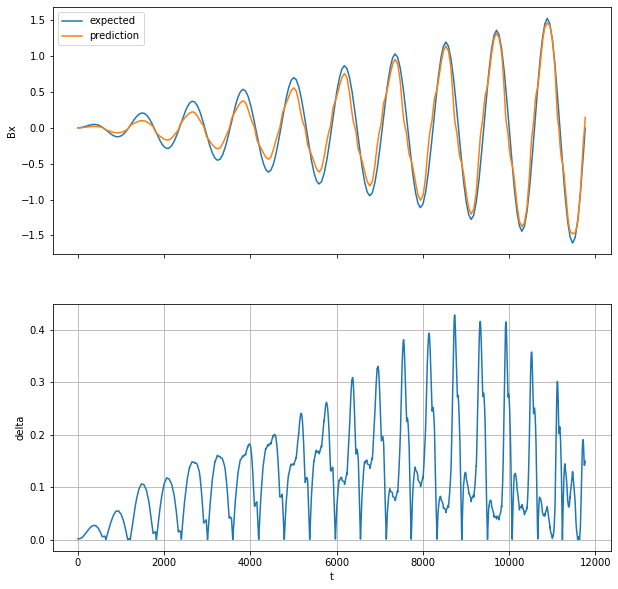

MSE: 0.021888506545482536


In [ ]:
model = tf.keras.models.load_model('./Model_CNV4_M6')
pred = inference_loop(model, M6_test_X[:, -7:, :])
del model

plot_predictions(pred, M6_test_Y, figsize=(10, 10))

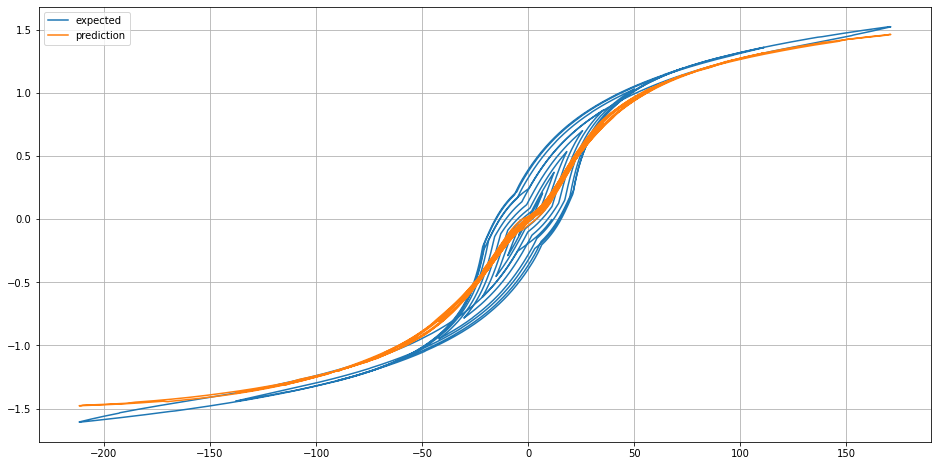

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(M6_test_X[:, -1, 0], M6_test_Y, label='expected')
plt.plot(M6_test_X[:, -1, 0], pred, label='prediction')
plt.grid()
plt.legend()
plt.show()

### M19

Epoch 1/1000
41/41 [==============================] - 2s 29ms/step - loss: 1.0947
Epoch 2/1000
41/41 [==============================] - 1s 29ms/step - loss: 0.0274
Epoch 3/1000
41/41 [==============================] - 1s 29ms/step - loss: 0.0105
Epoch 4/1000
41/41 [==============================] - 1s 29ms/step - loss: 0.0072
Epoch 5/1000
41/41 [==============================] - 1s 28ms/step - loss: 0.0051
Epoch 6/1000
41/41 [==============================] - 1s 28ms/step - loss: 0.0042
Epoch 7/1000
41/41 [==============================] - 1s 28ms/step - loss: 0.0033
Epoch 8/1000
41/41 [==============================] - 1s 28ms/step - loss: 0.0033
Epoch 9/1000
41/41 [==============================] - 1s 29ms/step - loss: 0.0079
Epoch 10/1000
41/41 [==============================] - 1s 29ms/step - loss: 0.0032
Epoch 11/1000
41/41 [==============================] - 1s 30ms/step - loss: 0.0032
Epoch 12/1000
41/41 [==============================] - 1s 29ms/step - loss: 0.0029
Epoch 13/1000

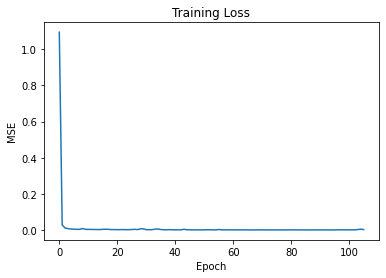

In [ ]:
model = new_model_cnv4()
history = compile_and_fit(model, M19_train_X[:, -7:, :], M19_train_Y)
model.save('./Model_CNV4_M19')
plot_train_stats(history)
del model, history

Start inference loop on 2001 samples... DONE after 67.38589882850647s


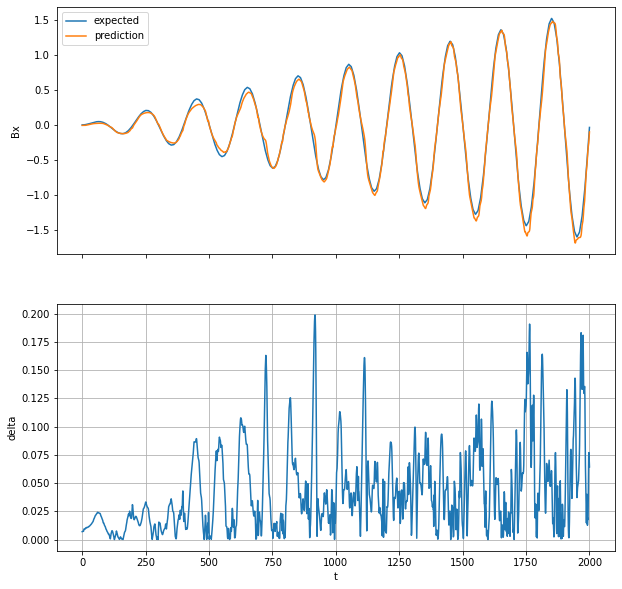

MSE: 0.0032619584163890206


In [ ]:
model = tf.keras.models.load_model('./Model_CNV4_M19')
pred = inference_loop(model, M19_train_X[:, -7:, :])
del model

plot_predictions(pred, M19_train_Y, figsize=(10, 10))

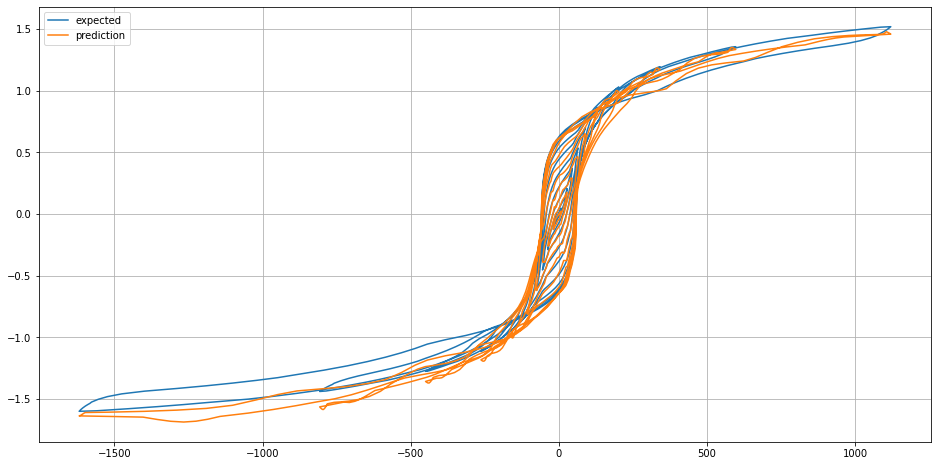

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(M19_train_X[:, -1, 0], M19_train_Y, label='expected')
plt.plot(M19_train_X[:, -1, 0], pred, label='prediction')
plt.grid()
plt.legend()
plt.show()

Start inference loop on 1178 samples... DONE after 39.680509090423584s


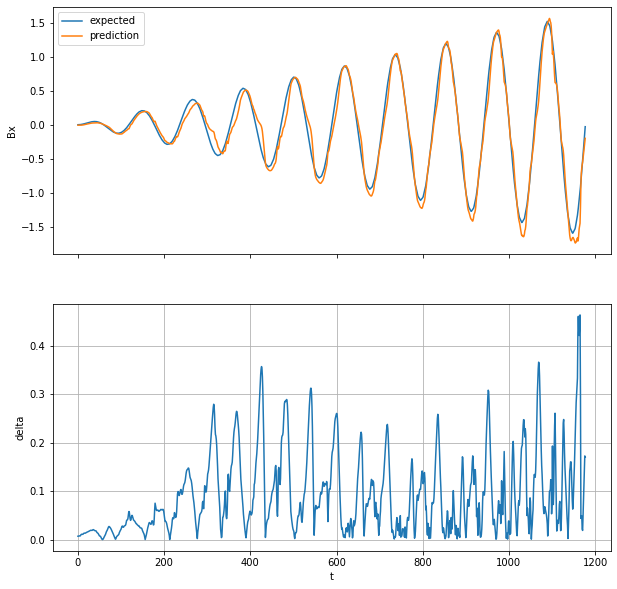

MSE: 0.0152142154207522


In [ ]:
model = tf.keras.models.load_model('./Model_CNV4_M19')
pred = inference_loop(model, M19_test_X[:, -7:, :])
del model

plot_predictions(pred, M19_test_Y, figsize=(10, 10))

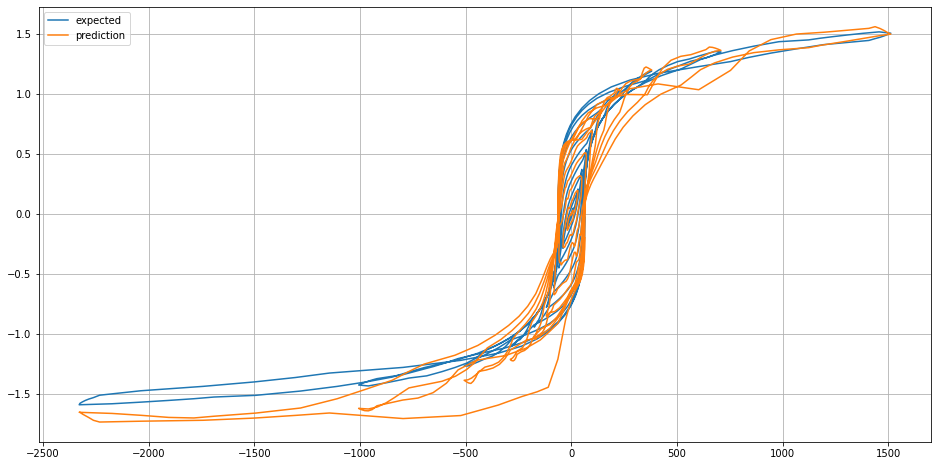

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(M19_test_X[:, -1, 0], M19_test_Y, label='expected')
plt.plot(M19_test_X[:, -1, 0], pred, label='prediction')
plt.grid()
plt.legend()
plt.show()

### M27

Epoch 1/1000
41/41 [==============================] - 2s 29ms/step - loss: 2.3159
Epoch 2/1000
41/41 [==============================] - 1s 29ms/step - loss: 0.0413
Epoch 3/1000
41/41 [==============================] - 1s 29ms/step - loss: 0.0169
Epoch 4/1000
41/41 [==============================] - 1s 29ms/step - loss: 0.0147
Epoch 5/1000
41/41 [==============================] - 1s 28ms/step - loss: 0.0108
Epoch 6/1000
41/41 [==============================] - 1s 28ms/step - loss: 0.0091
Epoch 7/1000
41/41 [==============================] - 1s 28ms/step - loss: 0.0071
Epoch 8/1000
41/41 [==============================] - 1s 29ms/step - loss: 0.0070
Epoch 9/1000
41/41 [==============================] - 1s 29ms/step - loss: 0.0088
Epoch 10/1000
41/41 [==============================] - 1s 29ms/step - loss: 0.0045
Epoch 11/1000
41/41 [==============================] - 1s 29ms/step - loss: 0.0063
Epoch 12/1000
41/41 [==============================] - 1s 29ms/step - loss: 0.0047
Epoch 13/1000

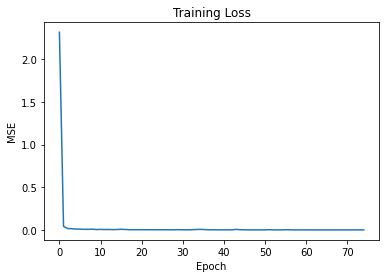

In [ ]:
model = new_model_cnv4()
history = compile_and_fit(model, M27_train_X[:, -7:, :], M27_train_Y)
model.save('./Model_CNV4_M27')
plot_train_stats(history)
del model, history

Start inference loop on 2001 samples... DONE after 66.07416129112244s


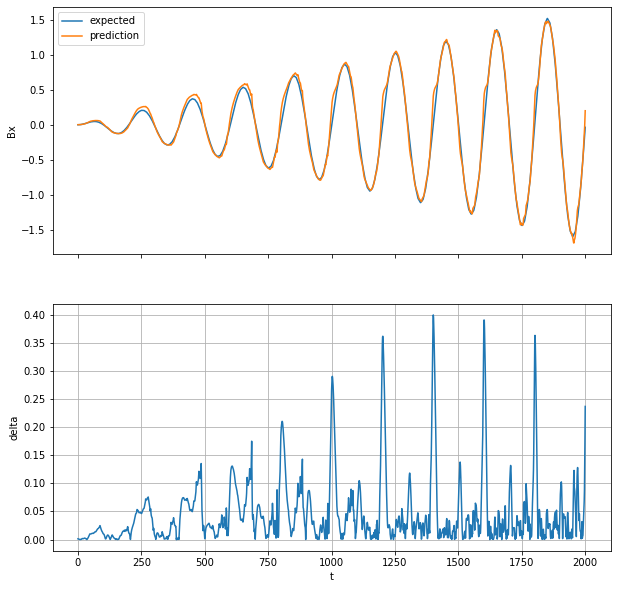

MSE: 0.005878397535205035


In [ ]:
model = tf.keras.models.load_model('./Model_CNV4_M27')
pred = inference_loop(model, M27_train_X[:, -7:, :])
del model

plot_predictions(pred, M27_train_Y, figsize=(10, 10))

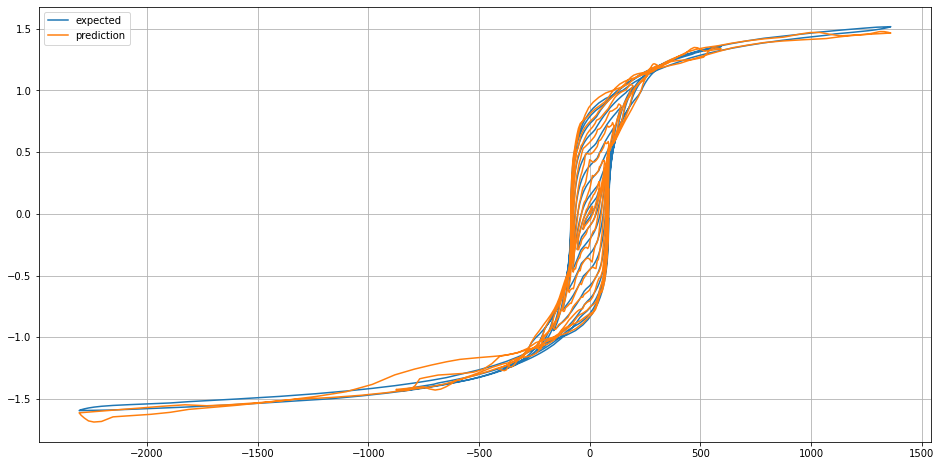

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(M27_train_X[:, -1, 0], M27_train_Y, label='expected')
plt.plot(M27_train_X[:, -1, 0], pred, label='prediction')
plt.grid()
plt.legend()
plt.show()

Start inference loop on 1178 samples... DONE after 40.397385120391846s


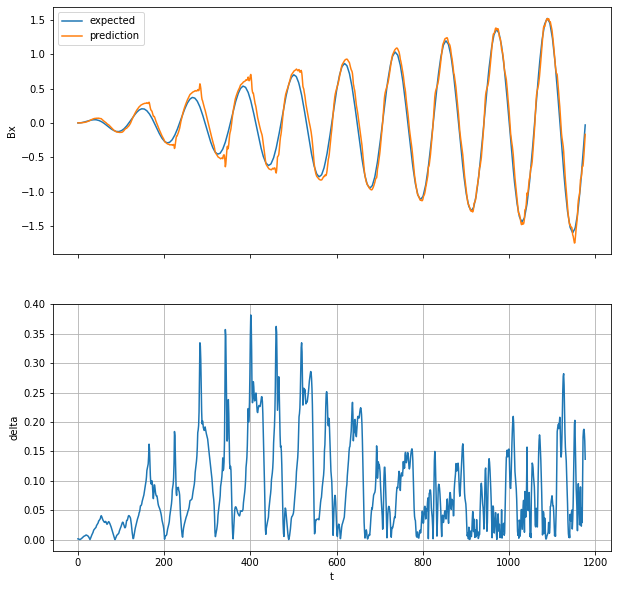

MSE: 0.013324247394266851


In [ ]:
model = tf.keras.models.load_model('./Model_CNV4_M27')
pred = inference_loop(model, M27_test_X[:, -7:, :])
del model

plot_predictions(pred, M27_test_Y, figsize=(10, 10))

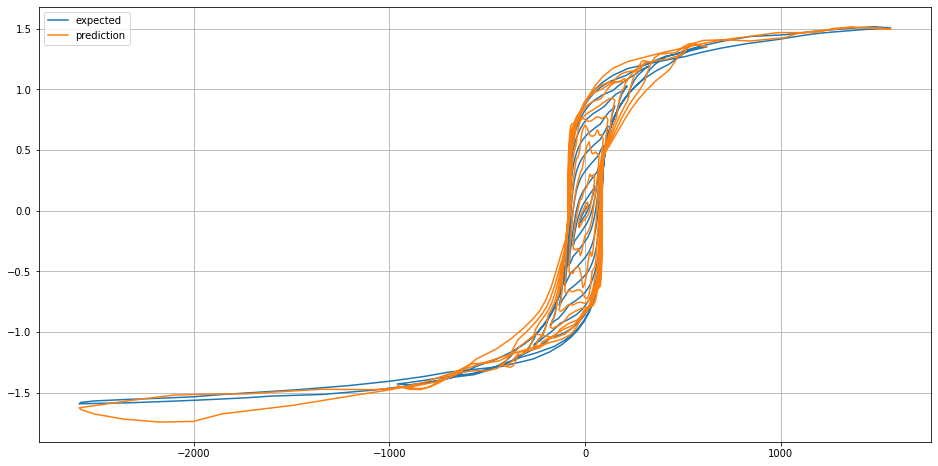

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(M27_test_X[:, -1, 0], M27_test_Y, label='expected')
plt.plot(M27_test_X[:, -1, 0], pred, label='prediction')
plt.grid()
plt.legend()
plt.show()

### 20PNF1500

Epoch 1/1000
41/41 [==============================] - 2s 29ms/step - loss: 0.5071
Epoch 2/1000
41/41 [==============================] - 1s 28ms/step - loss: 0.0128
Epoch 3/1000
41/41 [==============================] - 1s 28ms/step - loss: 0.0068
Epoch 4/1000
41/41 [==============================] - 1s 29ms/step - loss: 0.0053
Epoch 5/1000
41/41 [==============================] - 1s 28ms/step - loss: 0.0038
Epoch 6/1000
41/41 [==============================] - 1s 28ms/step - loss: 0.0030
Epoch 7/1000
41/41 [==============================] - 1s 28ms/step - loss: 0.0027
Epoch 8/1000
41/41 [==============================] - 1s 28ms/step - loss: 0.0024
Epoch 9/1000
41/41 [==============================] - 1s 28ms/step - loss: 0.0033
Epoch 10/1000
41/41 [==============================] - 1s 28ms/step - loss: 0.0021
Epoch 11/1000
41/41 [==============================] - 1s 28ms/step - loss: 0.0045
Epoch 12/1000
41/41 [==============================] - 1s 28ms/step - loss: 0.0020
Epoch 13/1000

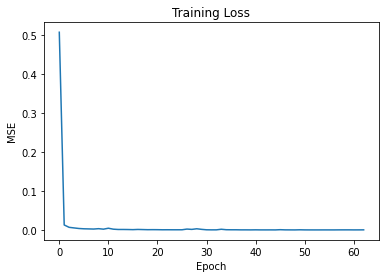

In [ ]:
model = new_model_cnv4()
history = compile_and_fit(model, _20PNF1500_train_X[:, -7:, :], _20PNF1500_train_Y)
model.save('./Model_CNV4__20PNF1500')
plot_train_stats(history)
del model, history

Start inference loop on 2001 samples... DONE after 66.70628547668457s


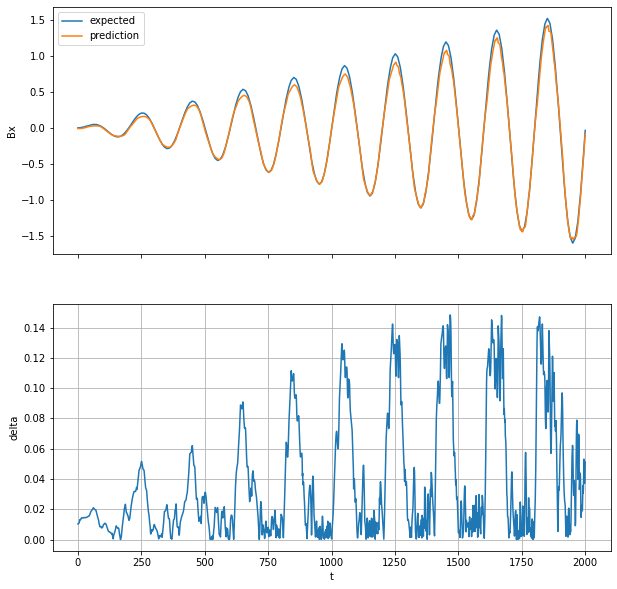

MSE: 0.003012701986824154


In [ ]:
model = tf.keras.models.load_model('./Model_CNV4__20PNF1500')
pred = inference_loop(model, _20PNF1500_train_X[:, -7:, :])
del model

plot_predictions(pred, _20PNF1500_train_Y, figsize=(10, 10))

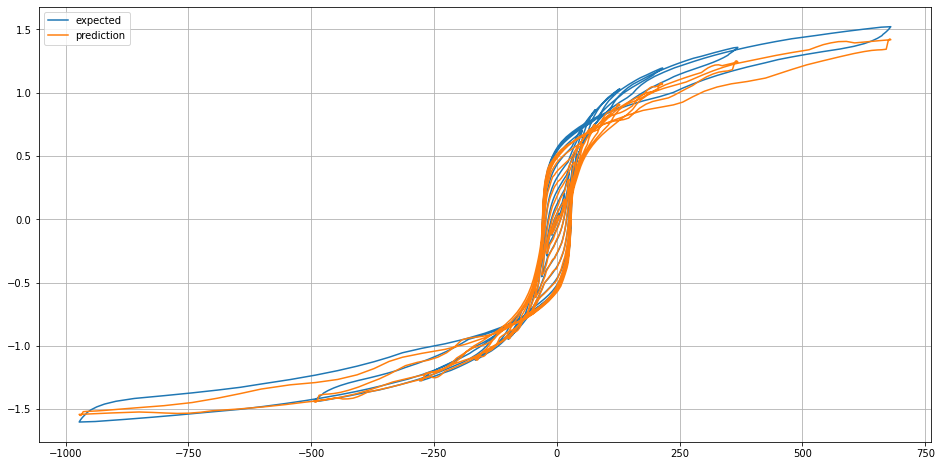

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(_20PNF1500_train_X[:, -1, 0], _20PNF1500_train_Y, label='expected')
plt.plot(_20PNF1500_train_X[:, -1, 0], pred, label='prediction')
plt.grid()
plt.legend()
plt.show()

Start inference loop on 11766 samples... DONE after 394.2050440311432s


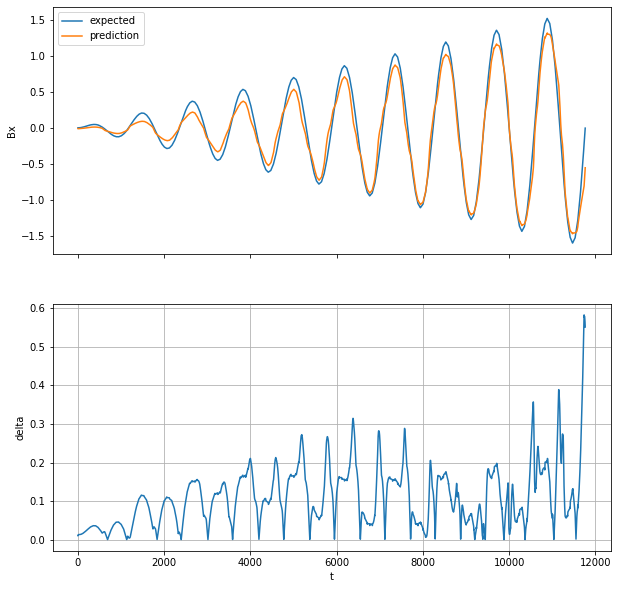

MSE: 0.017682740746259768


In [ ]:
model = tf.keras.models.load_model('./Model_CNV4__20PNF1500')
pred = inference_loop(model, _20PNF1500_test_X[:, -7:, :])
del model

plot_predictions(pred, _20PNF1500_test_Y, figsize=(10, 10))

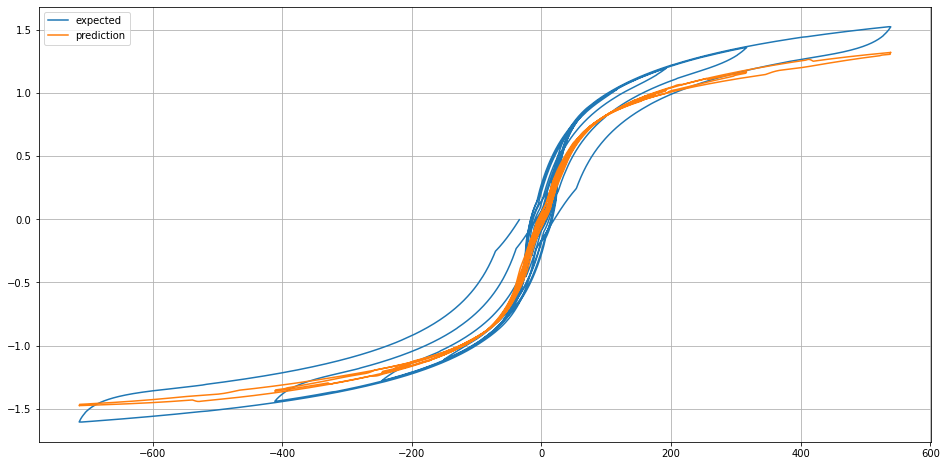

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(_20PNF1500_test_X[:, -1, 0], _20PNF1500_test_Y, label='expected')
plt.plot(_20PNF1500_test_X[:, -1, 0], pred, label='prediction')
plt.grid()
plt.legend()
plt.show()

## LSTM

### M6 (2000 data point version)

Epoch 1/1000
41/41 [==============================] - 15s 316ms/step - loss: 0.4922
Epoch 2/1000
41/41 [==============================] - 13s 318ms/step - loss: 0.0066
Epoch 3/1000
41/41 [==============================] - 13s 319ms/step - loss: 0.0031
Epoch 4/1000
41/41 [==============================] - 13s 318ms/step - loss: 0.0021
Epoch 5/1000
41/41 [==============================] - 13s 320ms/step - loss: 6.4565e-04
Epoch 6/1000
41/41 [==============================] - 13s 325ms/step - loss: 5.2060e-04
Epoch 7/1000
41/41 [==============================] - 13s 325ms/step - loss: 2.6243e-04
Epoch 8/1000
41/41 [==============================] - 13s 322ms/step - loss: 2.2875e-04
Epoch 9/1000
41/41 [==============================] - 13s 324ms/step - loss: 1.9623e-04
Epoch 10/1000
41/41 [==============================] - 13s 321ms/step - loss: 1.8354e-04
Epoch 11/1000
41/41 [==============================] - 13s 322ms/step - loss: 1.8546e-04
Epoch 12/1000
41/41 [=========================

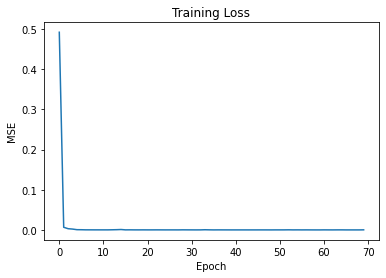

In [ ]:
model = new_model_lstm()
history = compile_and_fit(model, M6_train_X, M6_train_Y)
model.save('./Model_LSTM_M6')
plot_train_stats(history)
del model, history

Start inference loop on 2001 samples... DONE after 79.5196943283081s


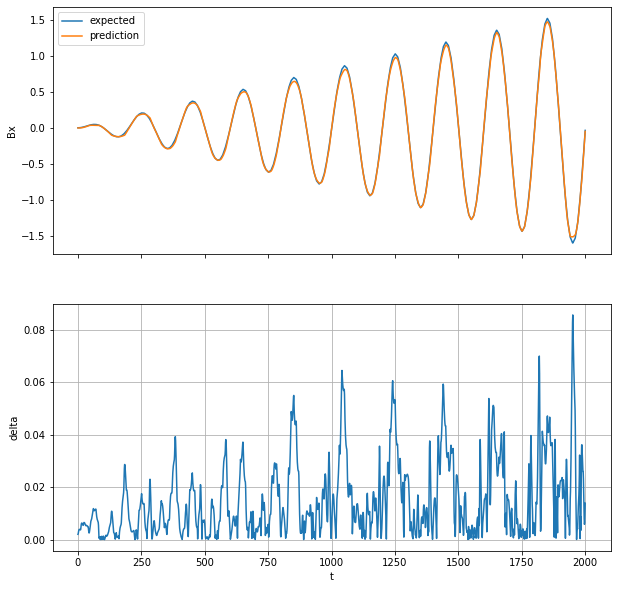

MSE: 0.0004353466712632558


In [ ]:
model = tf.keras.models.load_model('./Model_LSTM_M6')
pred = inference_loop(model, M6_train_X)
del model

plot_predictions(pred, M6_train_Y, figsize=(10, 10))

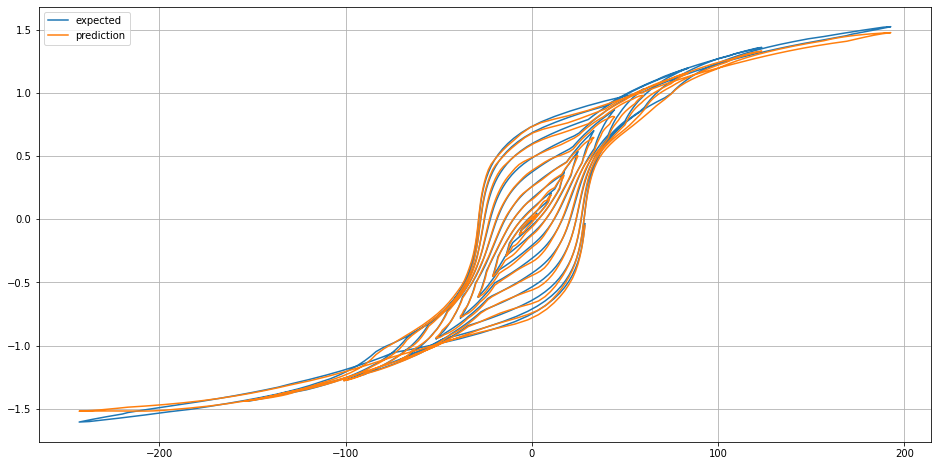

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(M6_train_X[:, -1, 0], M6_train_Y, label='expected')
plt.plot(M6_train_X[:, -1, 0], pred, label='prediction')
plt.grid()
plt.legend()
plt.show()

Start inference loop on 11766 samples... DONE after 471.058340549469s


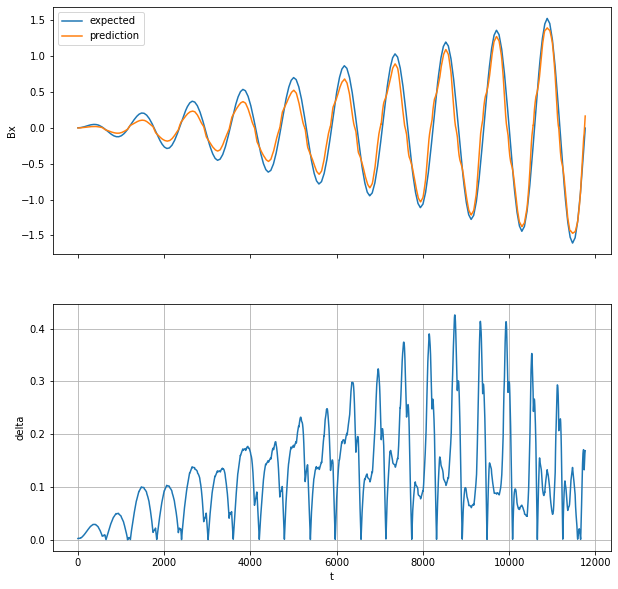

MSE: 0.02252023356212551


In [ ]:
model = tf.keras.models.load_model('./Model_LSTM_M6')
pred = inference_loop(model, M6_test_X)
del model

plot_predictions(pred, M6_test_Y, figsize=(10, 10))

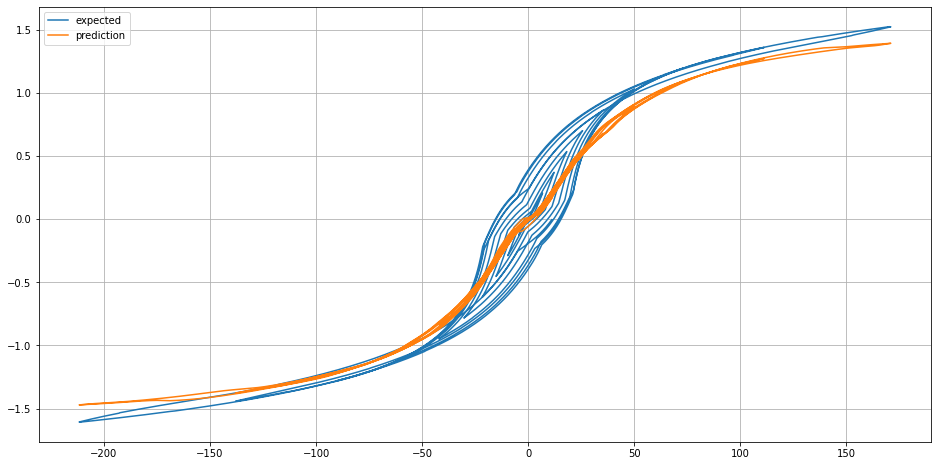

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(M6_test_X[:, -1, 0], M6_test_Y, label='expected')
plt.plot(M6_test_X[:, -1, 0], pred, label='prediction')
plt.grid()
plt.legend()
plt.show()

### M19

Epoch 1/1000
41/41 [==============================] - 16s 318ms/step - loss: 0.3753
Epoch 2/1000
41/41 [==============================] - 13s 317ms/step - loss: 0.0051
Epoch 3/1000
41/41 [==============================] - 13s 315ms/step - loss: 0.0017
Epoch 4/1000
41/41 [==============================] - 13s 318ms/step - loss: 0.0011
Epoch 5/1000
41/41 [==============================] - 13s 318ms/step - loss: 6.6501e-04
Epoch 6/1000
41/41 [==============================] - 13s 320ms/step - loss: 5.9056e-04
Epoch 7/1000
41/41 [==============================] - 13s 320ms/step - loss: 3.8645e-04
Epoch 8/1000
41/41 [==============================] - 13s 320ms/step - loss: 3.3010e-04
Epoch 9/1000
41/41 [==============================] - 13s 321ms/step - loss: 3.9741e-04
Epoch 10/1000
41/41 [==============================] - 13s 321ms/step - loss: 2.6863e-04
Epoch 11/1000
41/41 [==============================] - 13s 320ms/step - loss: 2.1516e-04
Epoch 12/1000
41/41 [=========================

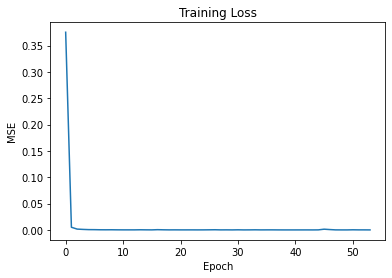

In [ ]:
model = new_model_lstm()
history = compile_and_fit(model, M19_train_X, M19_train_Y)
model.save('./Model_LSTM_M19')
plot_train_stats(history)
del model, history

Start inference loop on 2001 samples... DONE after 79.66019034385681s


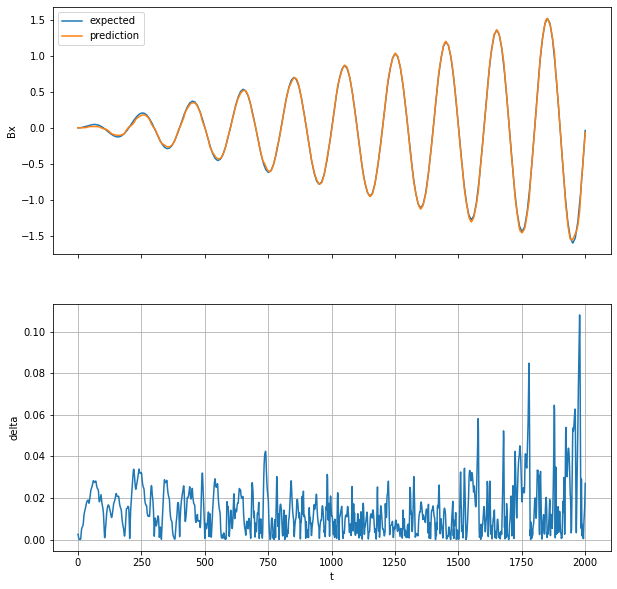

MSE: 0.0003488832579811523


In [ ]:
model = tf.keras.models.load_model('./Model_LSTM_M19')
pred = inference_loop(model, M19_train_X)
del model

plot_predictions(pred, M19_train_Y, figsize=(10, 10))

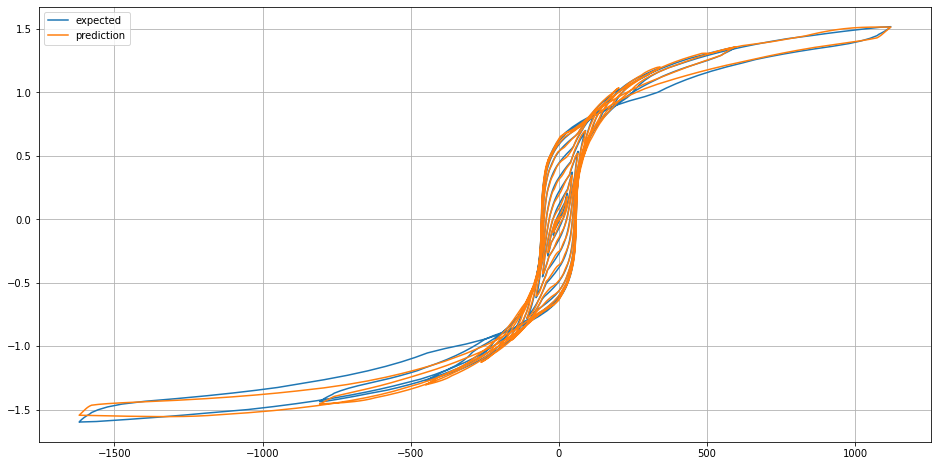

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(M19_train_X[:, -1, 0], M19_train_Y, label='expected')
plt.plot(M19_train_X[:, -1, 0], pred, label='prediction')
plt.grid()
plt.legend()
plt.show()

Start inference loop on 1178 samples... DONE after 48.40771222114563s


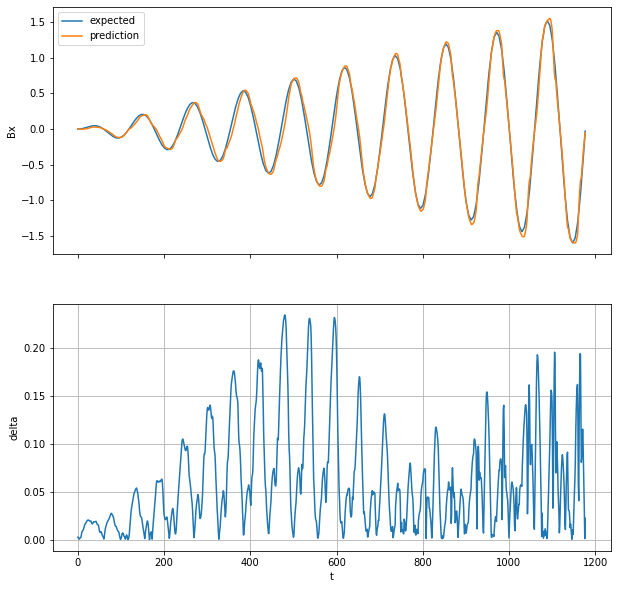

MSE: 0.0066306801374192694


In [ ]:
model = tf.keras.models.load_model('./Model_LSTM_M19')
pred = inference_loop(model, M19_test_X)
del model

plot_predictions(pred, M19_test_Y, figsize=(10, 10))

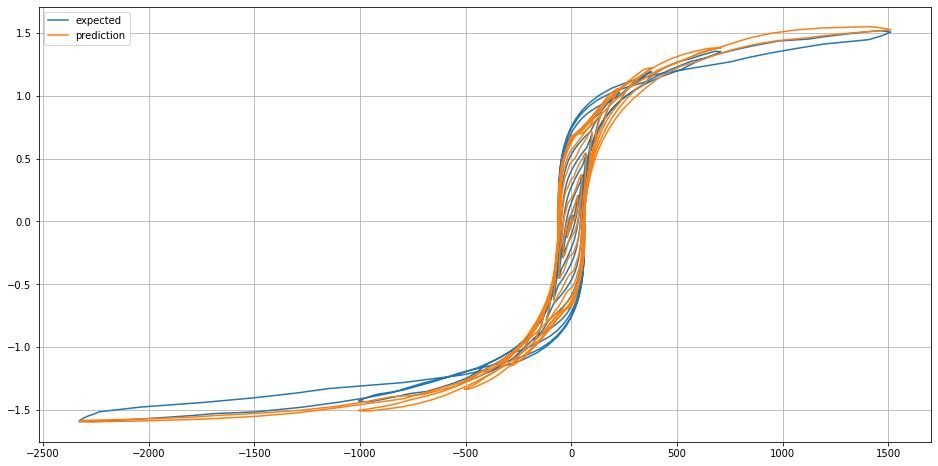

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(M19_test_X[:, -1, 0], M19_test_Y, label='expected')
plt.plot(M19_test_X[:, -1, 0], pred, label='prediction')
plt.grid()
plt.legend()
plt.show()

### M27

Epoch 1/1000
41/41 [==============================] - 15s 321ms/step - loss: 0.3049
Epoch 2/1000
41/41 [==============================] - 13s 320ms/step - loss: 0.0034
Epoch 3/1000
41/41 [==============================] - 13s 321ms/step - loss: 0.0010
Epoch 4/1000
41/41 [==============================] - 13s 321ms/step - loss: 0.0012
Epoch 5/1000
41/41 [==============================] - 13s 321ms/step - loss: 5.9039e-04
Epoch 6/1000
41/41 [==============================] - 13s 321ms/step - loss: 5.7481e-04
Epoch 7/1000
41/41 [==============================] - 13s 324ms/step - loss: 3.7530e-04
Epoch 8/1000
41/41 [==============================] - 13s 322ms/step - loss: 3.3325e-04
Epoch 9/1000
41/41 [==============================] - 13s 322ms/step - loss: 2.9964e-04
Epoch 10/1000
41/41 [==============================] - 13s 323ms/step - loss: 3.0311e-04
Epoch 11/1000
41/41 [==============================] - 13s 321ms/step - loss: 3.8282e-04
Epoch 12/1000
41/41 [=========================

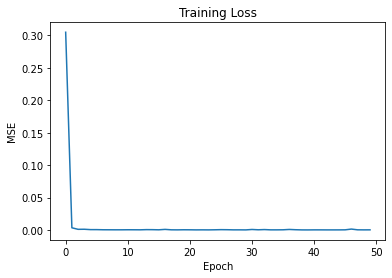

In [ ]:
model = new_model_lstm()
history = compile_and_fit(model, M27_train_X, M27_train_Y)
model.save('./Model_LSTM_M27')
plot_train_stats(history)
del model, history

Start inference loop on 2001 samples... DONE after 80.23658442497253s


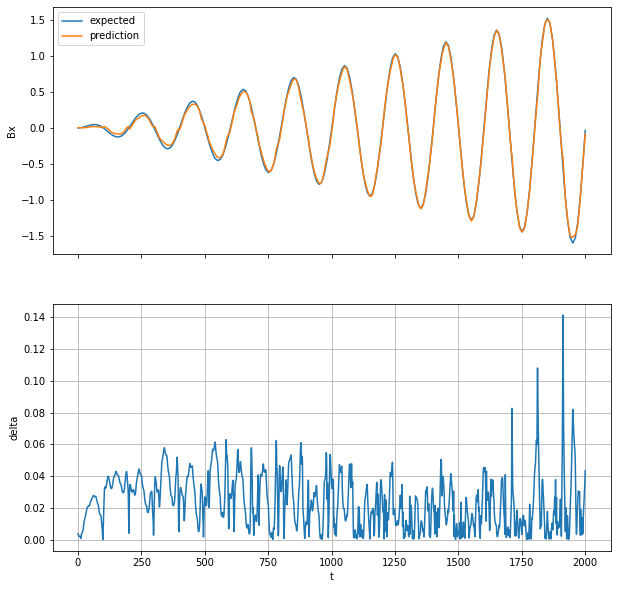

MSE: 0.0008441770570708349


In [ ]:
model = tf.keras.models.load_model('./Model_LSTM_M27')
pred = inference_loop(model, M27_train_X)
del model

plot_predictions(pred, M27_train_Y, figsize=(10, 10))

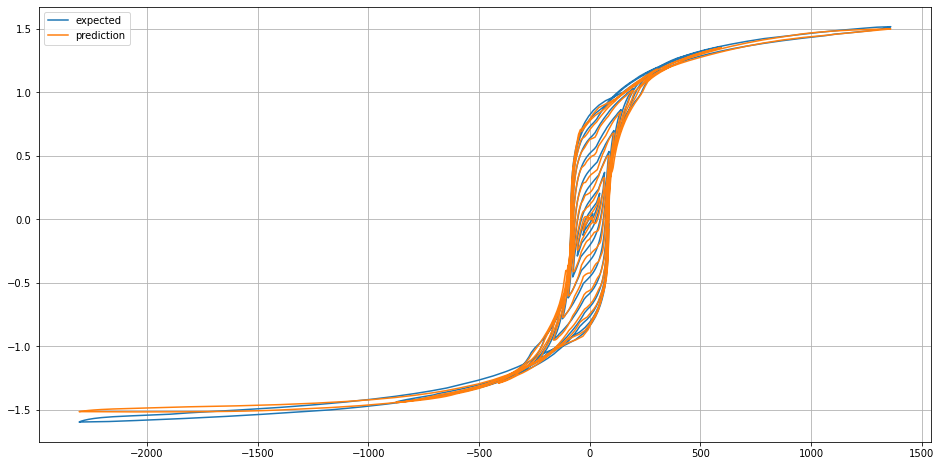

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(M27_train_X[:, -1, 0], M27_train_Y, label='expected')
plt.plot(M27_train_X[:, -1, 0], pred, label='prediction')
plt.grid()
plt.legend()
plt.show()

Start inference loop on 1178 samples... DONE after 48.178011655807495s


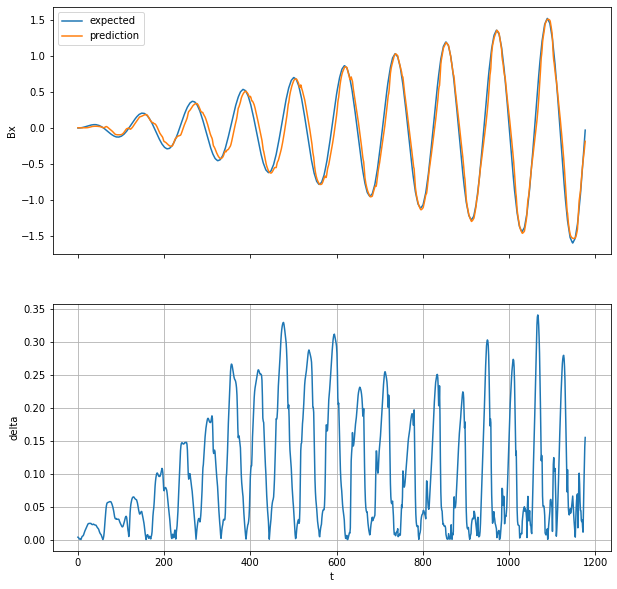

MSE: 0.017689227164650663


In [ ]:
model = tf.keras.models.load_model('./Model_LSTM_M27')
pred = inference_loop(model, M27_test_X)
del model

plot_predictions(pred, M27_test_Y, figsize=(10, 10))

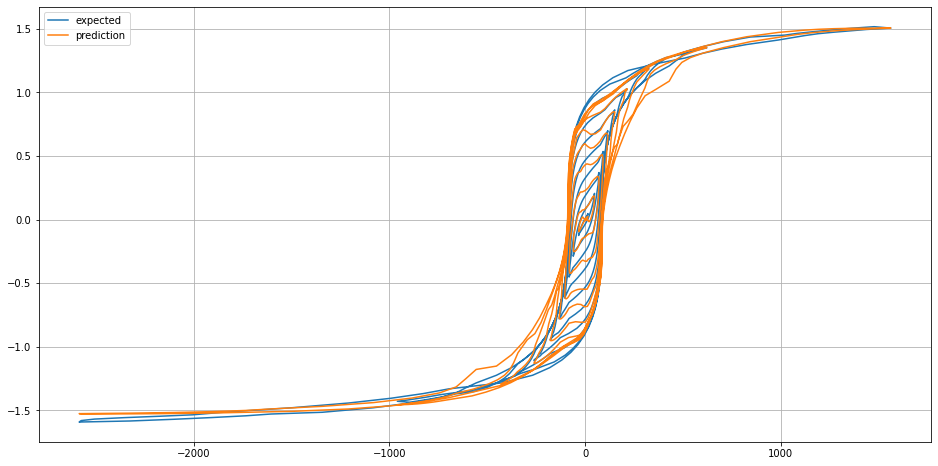

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(M27_test_X[:, -1, 0], M27_test_Y, label='expected')
plt.plot(M27_test_X[:, -1, 0], pred, label='prediction')
plt.grid()
plt.legend()
plt.show()

### 20PNF1500

Epoch 1/1000
41/41 [==============================] - 16s 322ms/step - loss: 0.4501
Epoch 2/1000
41/41 [==============================] - 13s 322ms/step - loss: 0.0047
Epoch 3/1000
41/41 [==============================] - 13s 320ms/step - loss: 0.0019
Epoch 4/1000
41/41 [==============================] - 13s 323ms/step - loss: 9.1552e-04
Epoch 5/1000
41/41 [==============================] - 13s 326ms/step - loss: 5.9429e-04
Epoch 6/1000
41/41 [==============================] - 13s 324ms/step - loss: 4.6599e-04
Epoch 7/1000
41/41 [==============================] - 13s 325ms/step - loss: 3.5300e-04
Epoch 8/1000
41/41 [==============================] - 13s 327ms/step - loss: 3.1153e-04
Epoch 9/1000
41/41 [==============================] - 13s 325ms/step - loss: 2.5312e-04
Epoch 10/1000
41/41 [==============================] - 13s 324ms/step - loss: 2.4026e-04
Epoch 11/1000
41/41 [==============================] - 13s 325ms/step - loss: 2.2824e-04
Epoch 12/1000
41/41 [=====================

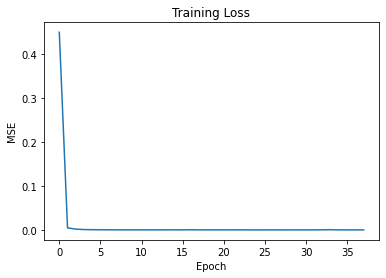

In [ ]:
model = new_model_lstm()
history = compile_and_fit(model, _20PNF1500_train_X, _20PNF1500_train_Y)
model.save('./Model_LSTM__20PNF1500')
plot_train_stats(history)
del model, history

Start inference loop on 2001 samples... DONE after 80.35204648971558s


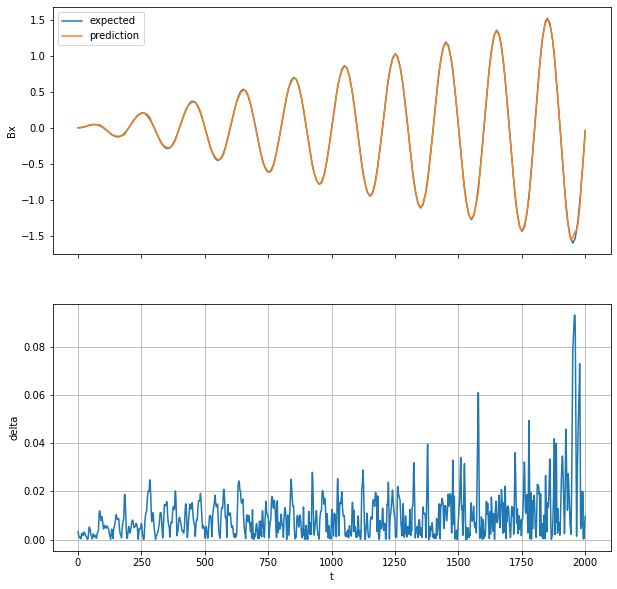

MSE: 0.0002079879036829996


In [ ]:
model = tf.keras.models.load_model('./Model_LSTM__20PNF1500')
pred = inference_loop(model, _20PNF1500_train_X)
del model

plot_predictions(pred, _20PNF1500_train_Y, figsize=(10, 10))

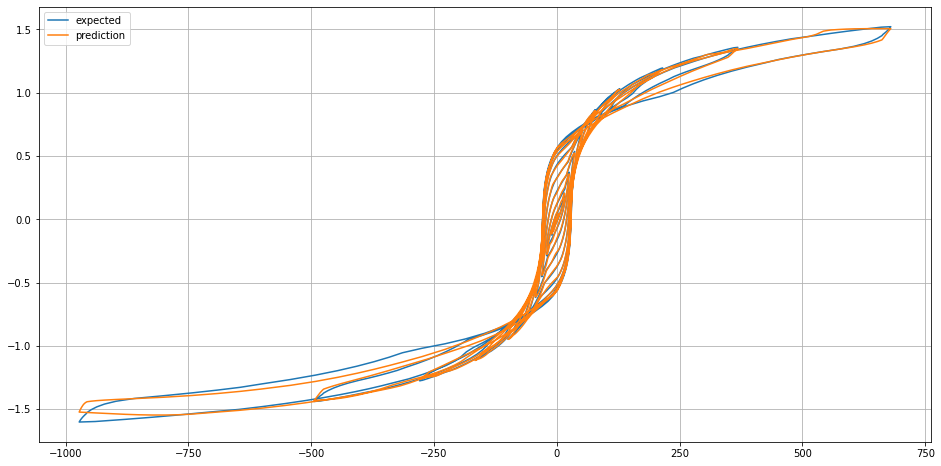

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(_20PNF1500_train_X[:, -1, 0], _20PNF1500_train_Y, label='expected')
plt.plot(_20PNF1500_train_X[:, -1, 0], pred, label='prediction')
plt.grid()
plt.legend()
plt.show()

Start inference loop on 11766 samples... DONE after 473.9872109889984s


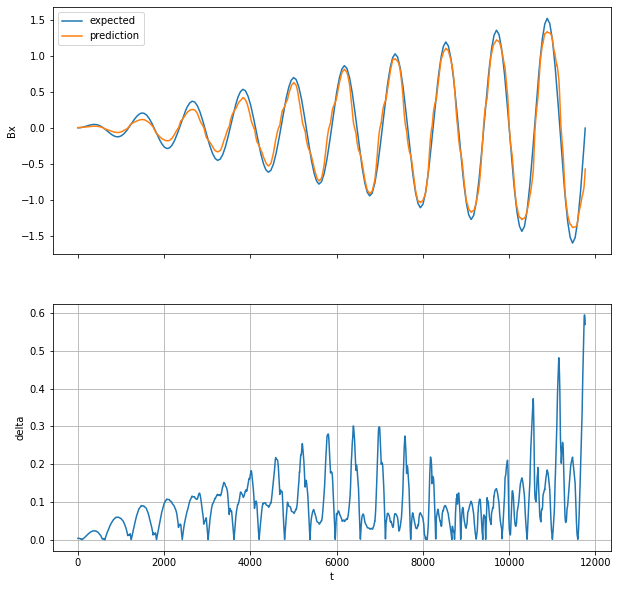

MSE: 0.014745240766236624


In [ ]:
model = tf.keras.models.load_model('./Model_LSTM__20PNF1500')
pred = inference_loop(model, _20PNF1500_test_X)
del model

plot_predictions(pred, _20PNF1500_test_Y, figsize=(10, 10))

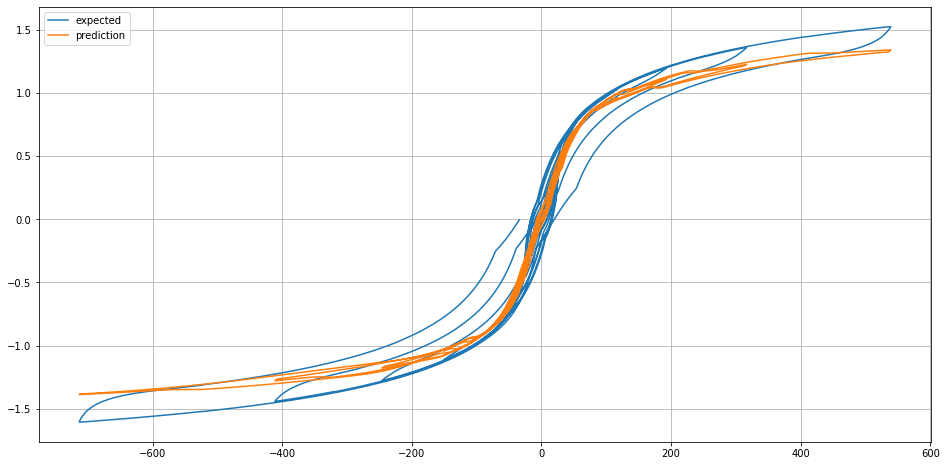

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(_20PNF1500_test_X[:, -1, 0], _20PNF1500_test_Y, label='expected')
plt.plot(_20PNF1500_test_X[:, -1, 0], pred, label='prediction')
plt.grid()
plt.legend()
plt.show()

## GRU1

### M6 (2000 data point version)

Epoch 1/1000
41/41 [==============================] - 3s 17ms/step - loss: 0.1582
Epoch 2/1000
41/41 [==============================] - 1s 16ms/step - loss: 0.0254
Epoch 3/1000
41/41 [==============================] - 1s 17ms/step - loss: 0.0102
Epoch 4/1000
41/41 [==============================] - 1s 17ms/step - loss: 0.0057
Epoch 5/1000
41/41 [==============================] - 1s 17ms/step - loss: 0.0040
Epoch 6/1000
41/41 [==============================] - 1s 17ms/step - loss: 0.0032
Epoch 7/1000
41/41 [==============================] - 1s 16ms/step - loss: 0.0028
Epoch 8/1000
41/41 [==============================] - 1s 16ms/step - loss: 0.0024
Epoch 9/1000
41/41 [==============================] - 1s 17ms/step - loss: 0.0021
Epoch 10/1000
41/41 [==============================] - 1s 16ms/step - loss: 0.0018
Epoch 11/1000
41/41 [==============================] - 1s 16ms/step - loss: 0.0017
Epoch 12/1000
41/41 [==============================] - 1s 17ms/step - loss: 0.0014
Epoch 13/1000

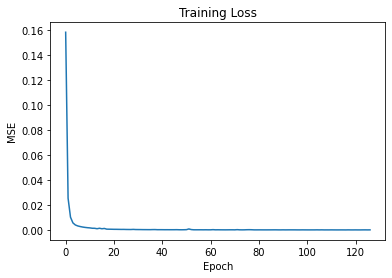

In [ ]:
model = new_model_gru1()
history = compile_and_fit(model, M6_train_X, M6_train_Y)
model.save('./Model_GRU1_M6')
plot_train_stats(history)
del model, history

Start inference loop on 2001 samples... DONE after 66.8943612575531s


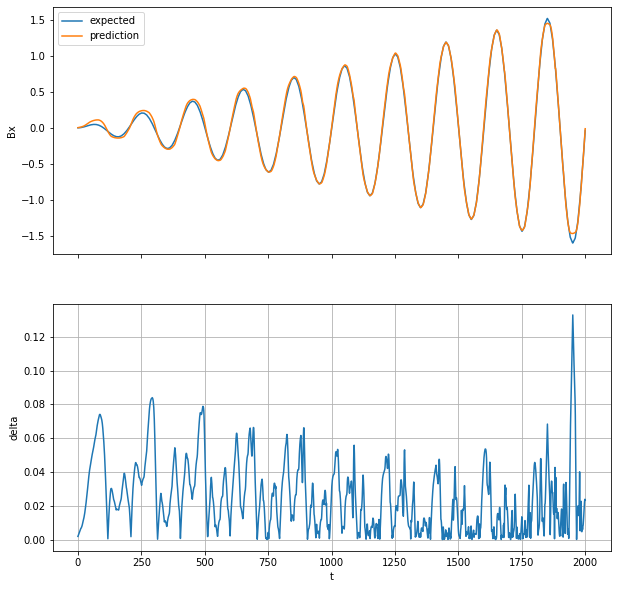

MSE: 0.0010614248112008548


In [ ]:
model = tf.keras.models.load_model('./Model_GRU1_M6')
pred = inference_loop(model, M6_train_X)
del model

plot_predictions(pred, M6_train_Y, figsize=(10, 10))

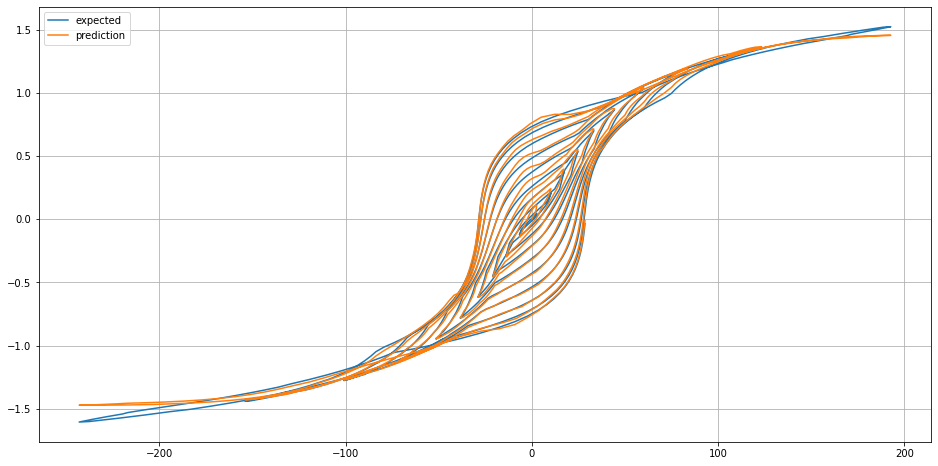

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(M6_train_X[:, -1, 0], M6_train_Y, label='expected')
plt.plot(M6_train_X[:, -1, 0], pred, label='prediction')
plt.grid()
plt.legend()
plt.show()

Start inference loop on 11766 samples... DONE after 394.46538376808167s


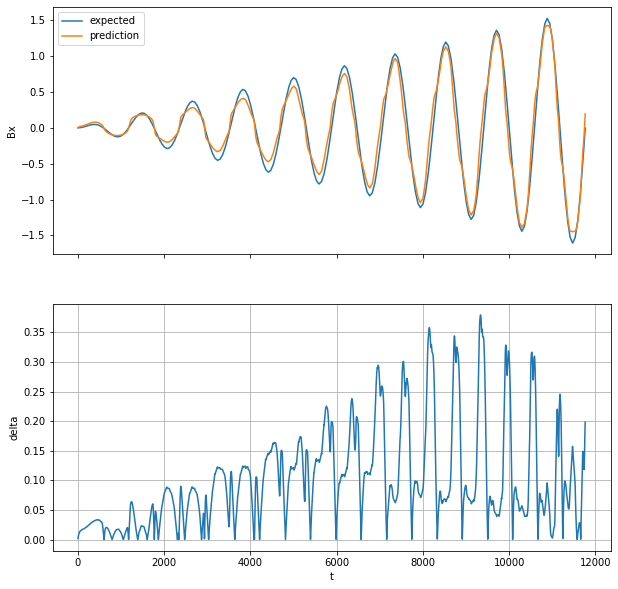

MSE: 0.0173729728782506


In [ ]:
model = tf.keras.models.load_model('./Model_GRU1_M6')
pred = inference_loop(model, M6_test_X)
del model

plot_predictions(pred, M6_test_Y, figsize=(10, 10))

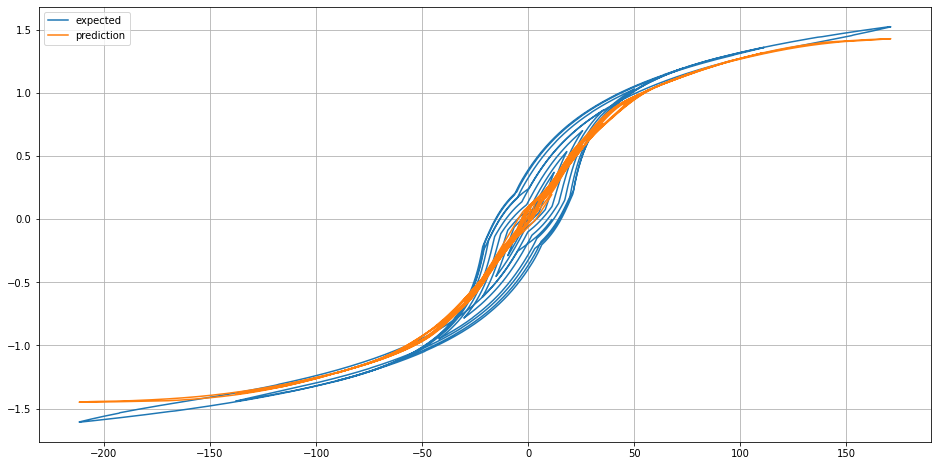

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(M6_test_X[:, -1, 0], M6_test_Y, label='expected')
plt.plot(M6_test_X[:, -1, 0], pred, label='prediction')
plt.grid()
plt.legend()
plt.show()

### M19

Epoch 1/1000
41/41 [==============================] - 3s 17ms/step - loss: 0.2195
Epoch 2/1000
41/41 [==============================] - 1s 16ms/step - loss: 0.0306
Epoch 3/1000
41/41 [==============================] - 1s 16ms/step - loss: 0.0127
Epoch 4/1000
41/41 [==============================] - 1s 16ms/step - loss: 0.0099
Epoch 5/1000
41/41 [==============================] - 1s 16ms/step - loss: 0.0076
Epoch 6/1000
41/41 [==============================] - 1s 16ms/step - loss: 0.0058
Epoch 7/1000
41/41 [==============================] - 1s 17ms/step - loss: 0.0041
Epoch 8/1000
41/41 [==============================] - 1s 16ms/step - loss: 0.0035
Epoch 9/1000
41/41 [==============================] - 1s 17ms/step - loss: 0.0033
Epoch 10/1000
41/41 [==============================] - 1s 17ms/step - loss: 0.0028
Epoch 11/1000
41/41 [==============================] - 1s 17ms/step - loss: 0.0029
Epoch 12/1000
41/41 [==============================] - 1s 16ms/step - loss: 0.0023
Epoch 13/1000

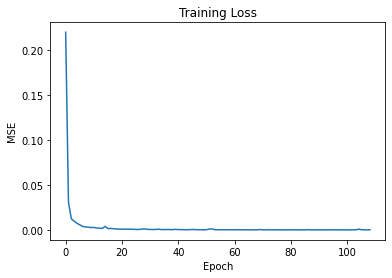

In [ ]:
model = new_model_gru1()
history = compile_and_fit(model, M19_train_X, M19_train_Y)
model.save('./Model_GRU1_M19')
plot_train_stats(history)
del model, history

Start inference loop on 2001 samples... DONE after 66.84694981575012s


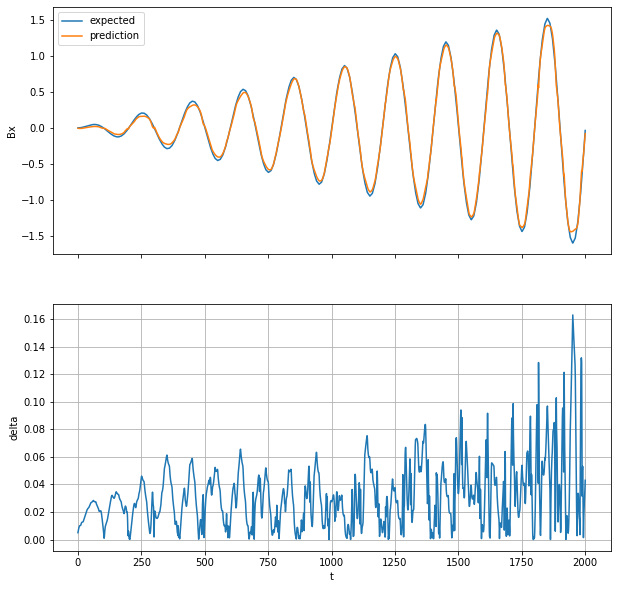

MSE: 0.001573834713225449


In [ ]:
model = tf.keras.models.load_model('./Model_GRU1_M19')
pred = inference_loop(model, M19_train_X)
del model

plot_predictions(pred, M19_train_Y, figsize=(10, 10))

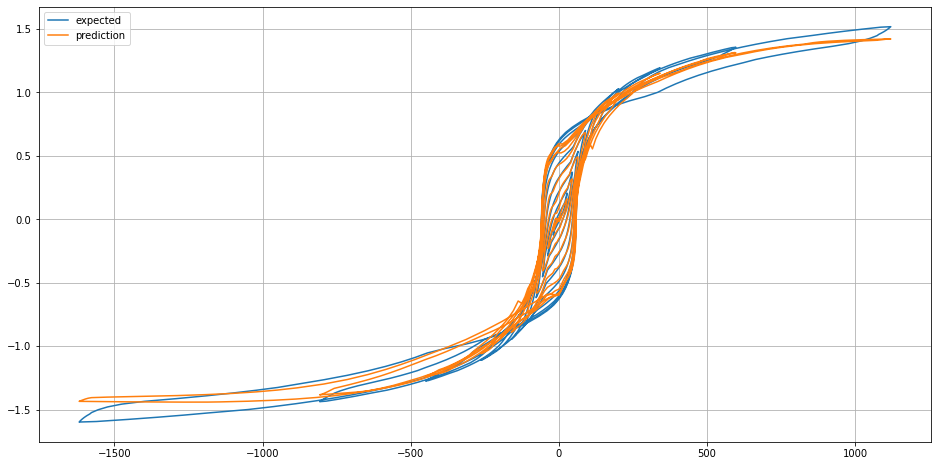

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(M19_train_X[:, -1, 0], M19_train_Y, label='expected')
plt.plot(M19_train_X[:, -1, 0], pred, label='prediction')
plt.grid()
plt.legend()
plt.show()

Start inference loop on 1178 samples... DONE after 40.190999269485474s


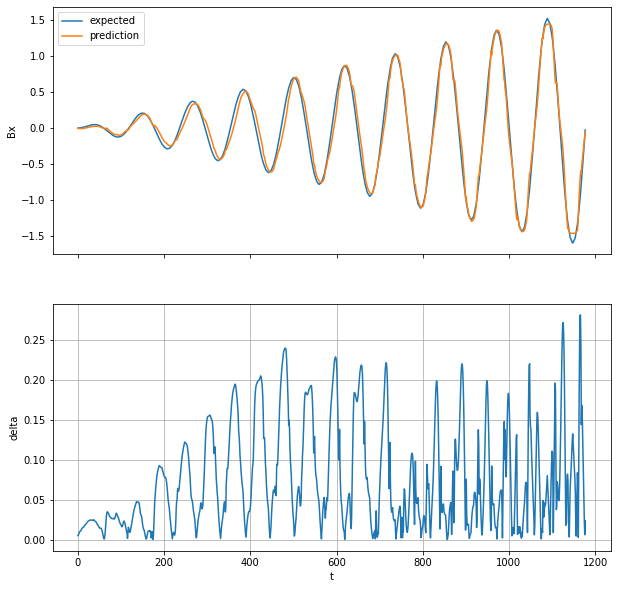

MSE: 0.009856129922011911


In [ ]:
model = tf.keras.models.load_model('./Model_GRU1_M19')
pred = inference_loop(model, M19_test_X)
del model

plot_predictions(pred, M19_test_Y, figsize=(10, 10))

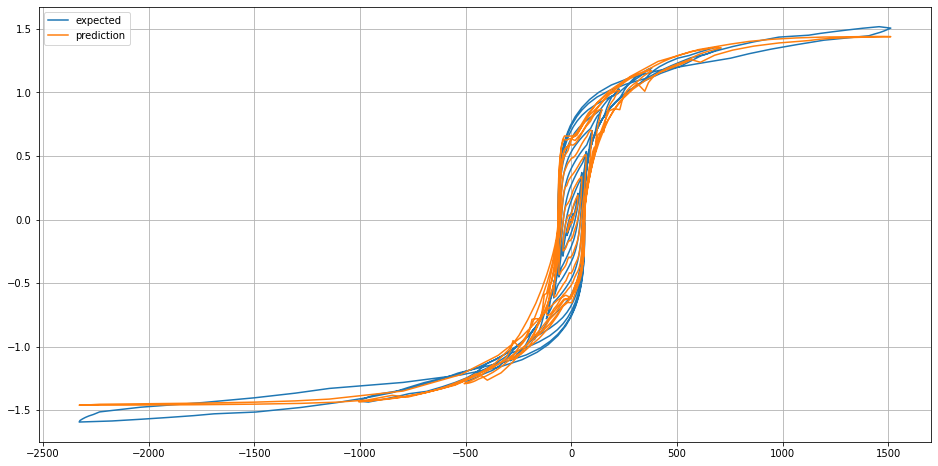

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(M19_test_X[:, -1, 0], M19_test_Y, label='expected')
plt.plot(M19_test_X[:, -1, 0], pred, label='prediction')
plt.grid()
plt.legend()
plt.show()

### M27

Epoch 1/1000
41/41 [==============================] - 3s 17ms/step - loss: 0.2347
Epoch 2/1000
41/41 [==============================] - 1s 18ms/step - loss: 0.0281
Epoch 3/1000
41/41 [==============================] - 1s 17ms/step - loss: 0.0132
Epoch 4/1000
41/41 [==============================] - 1s 16ms/step - loss: 0.0105
Epoch 5/1000
41/41 [==============================] - 1s 17ms/step - loss: 0.0075
Epoch 6/1000
41/41 [==============================] - 1s 17ms/step - loss: 0.0061
Epoch 7/1000
41/41 [==============================] - 1s 16ms/step - loss: 0.0048
Epoch 8/1000
41/41 [==============================] - 1s 17ms/step - loss: 0.0040
Epoch 9/1000
41/41 [==============================] - 1s 15ms/step - loss: 0.0036
Epoch 10/1000
41/41 [==============================] - 1s 16ms/step - loss: 0.0032
Epoch 11/1000
41/41 [==============================] - 1s 16ms/step - loss: 0.0029
Epoch 12/1000
41/41 [==============================] - 1s 17ms/step - loss: 0.0025
Epoch 13/1000

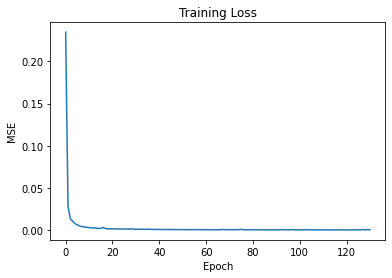

In [ ]:
model = new_model_gru1()
history = compile_and_fit(model, M27_train_X, M27_train_Y)
model.save('./Model_GRU1_M27')
plot_train_stats(history)
del model, history

Start inference loop on 2001 samples... DONE after 67.45447134971619s


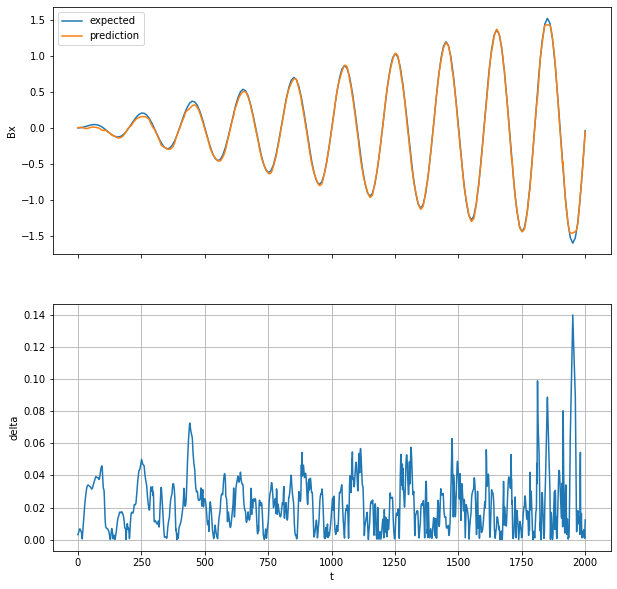

MSE: 0.0007881168579872731


In [ ]:
model = tf.keras.models.load_model('./Model_GRU1_M27')
pred = inference_loop(model, M27_train_X)
del model

plot_predictions(pred, M27_train_Y, figsize=(10, 10))

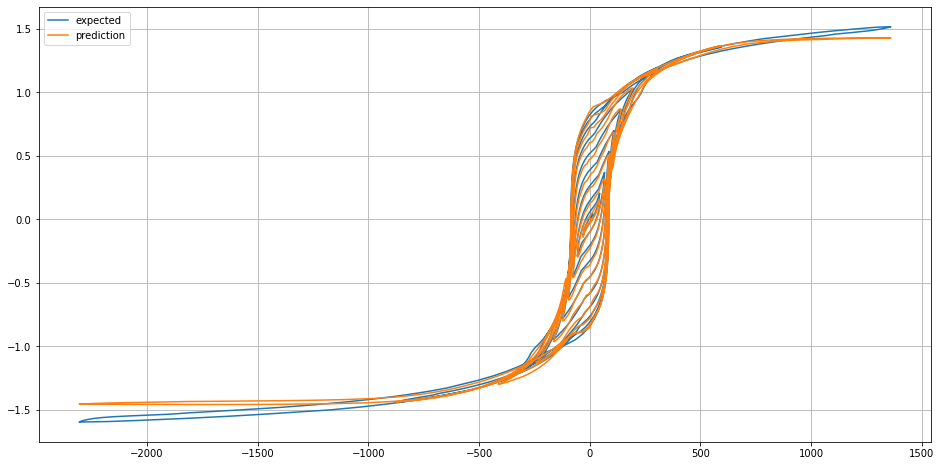

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(M27_train_X[:, -1, 0], M27_train_Y, label='expected')
plt.plot(M27_train_X[:, -1, 0], pred, label='prediction')
plt.grid()
plt.legend()
plt.show()

Start inference loop on 1178 samples... DONE after 39.97106742858887s


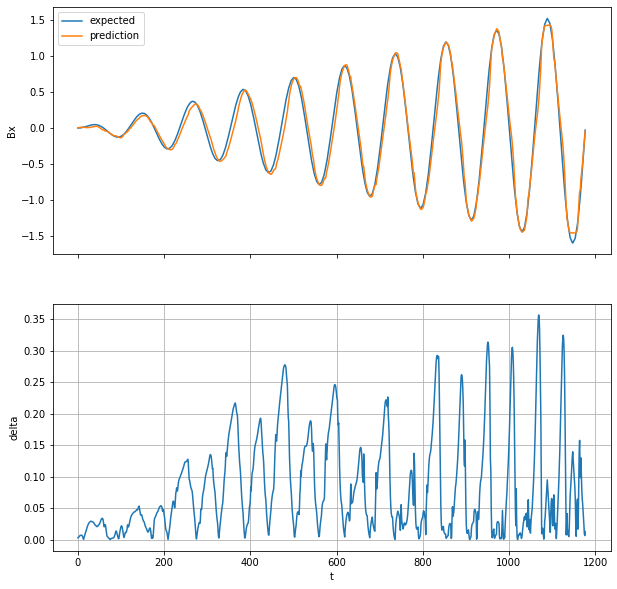

MSE: 0.013051433550249056


In [ ]:
model = tf.keras.models.load_model('./Model_GRU1_M27')
pred = inference_loop(model, M27_test_X)
del model

plot_predictions(pred, M27_test_Y, figsize=(10, 10))

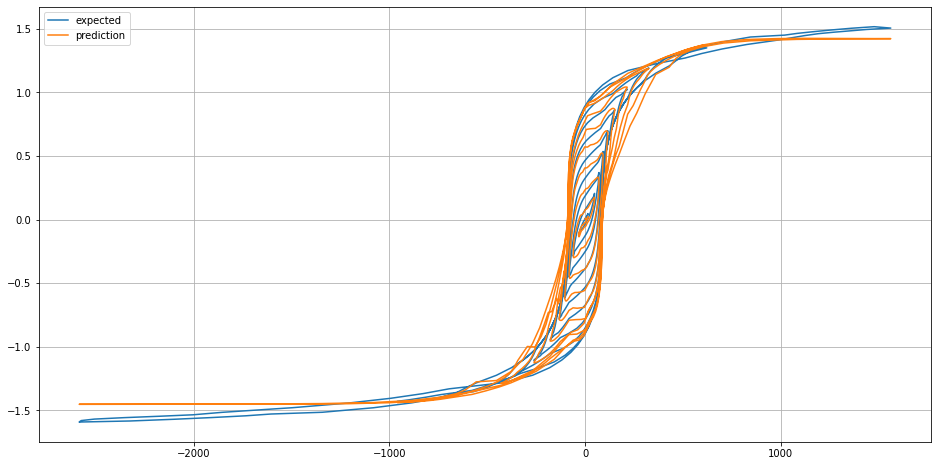

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(M27_test_X[:, -1, 0], M27_test_Y, label='expected')
plt.plot(M27_test_X[:, -1, 0], pred, label='prediction')
plt.grid()
plt.legend()
plt.show()

### 20PNF1500

Epoch 1/1000
41/41 [==============================] - 5s 22ms/step - loss: 0.1285
Epoch 2/1000
41/41 [==============================] - 1s 18ms/step - loss: 0.0135
Epoch 3/1000
41/41 [==============================] - 1s 14ms/step - loss: 0.0074
Epoch 4/1000
41/41 [==============================] - 1s 16ms/step - loss: 0.0055
Epoch 5/1000
41/41 [==============================] - 1s 15ms/step - loss: 0.0043
Epoch 6/1000
41/41 [==============================] - 1s 14ms/step - loss: 0.0037
Epoch 7/1000
41/41 [==============================] - 1s 16ms/step - loss: 0.0033
Epoch 8/1000
41/41 [==============================] - 1s 16ms/step - loss: 0.0029
Epoch 9/1000
41/41 [==============================] - 1s 17ms/step - loss: 0.0026
Epoch 10/1000
41/41 [==============================] - 1s 17ms/step - loss: 0.0024
Epoch 11/1000
41/41 [==============================] - 1s 30ms/step - loss: 0.0023
Epoch 12/1000
41/41 [==============================] - 1s 22ms/step - loss: 0.0019
Epoch 13/1000

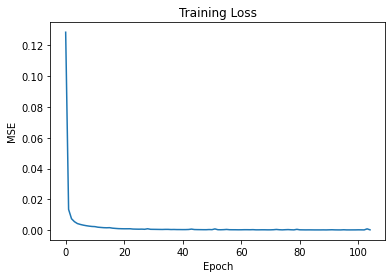

In [ ]:
model = new_model_gru1()
history = compile_and_fit(model, _20PNF1500_train_X, _20PNF1500_train_Y)
model.save('./Model_GRU1__20PNF1500')
plot_train_stats(history)
del model, history

Start inference loop on 2001 samples... DONE after 66.79514503479004s


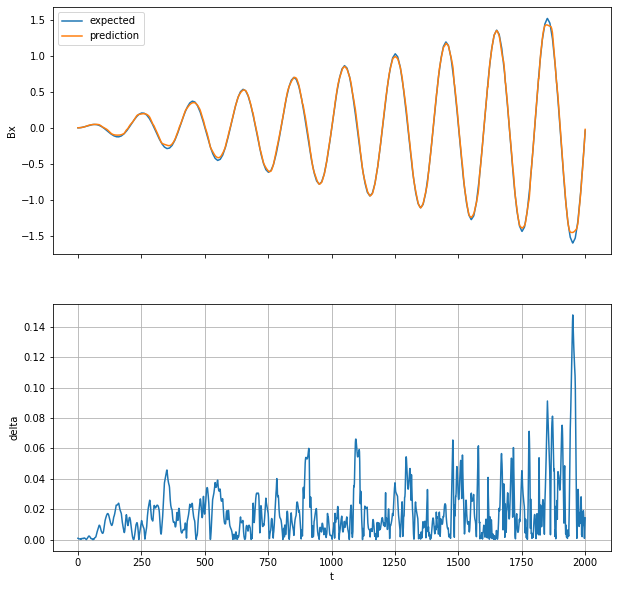

MSE: 0.00065506163591909


In [ ]:
model = tf.keras.models.load_model('./Model_GRU1__20PNF1500')
pred = inference_loop(model, _20PNF1500_train_X)
del model

plot_predictions(pred, _20PNF1500_train_Y, figsize=(10, 10))

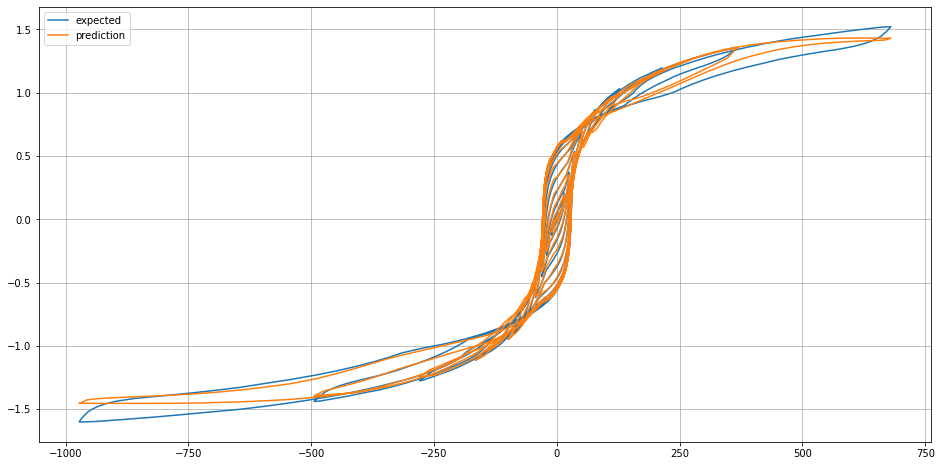

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(_20PNF1500_train_X[:, -1, 0], _20PNF1500_train_Y, label='expected')
plt.plot(_20PNF1500_train_X[:, -1, 0], pred, label='prediction')
plt.grid()
plt.legend()
plt.show()

Start inference loop on 11766 samples... DONE after 395.02791929244995s


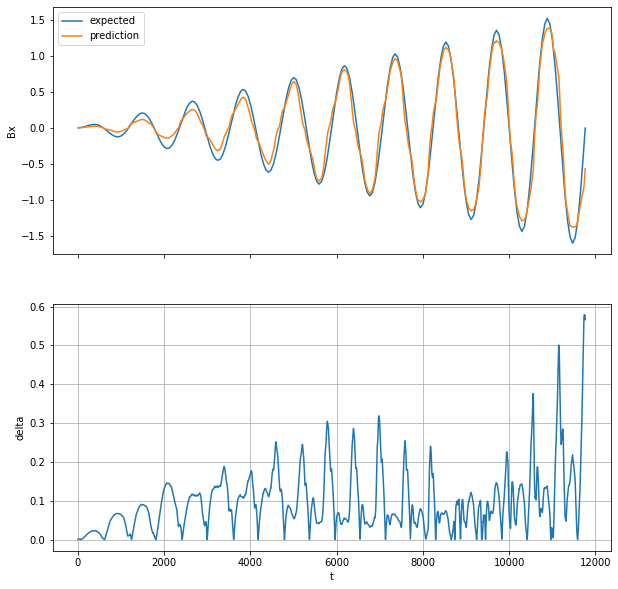

MSE: 0.015421062323007854


In [ ]:
model = tf.keras.models.load_model('./Model_GRU1__20PNF1500')
pred = inference_loop(model, _20PNF1500_test_X)
del model

plot_predictions(pred, _20PNF1500_test_Y, figsize=(10, 10))

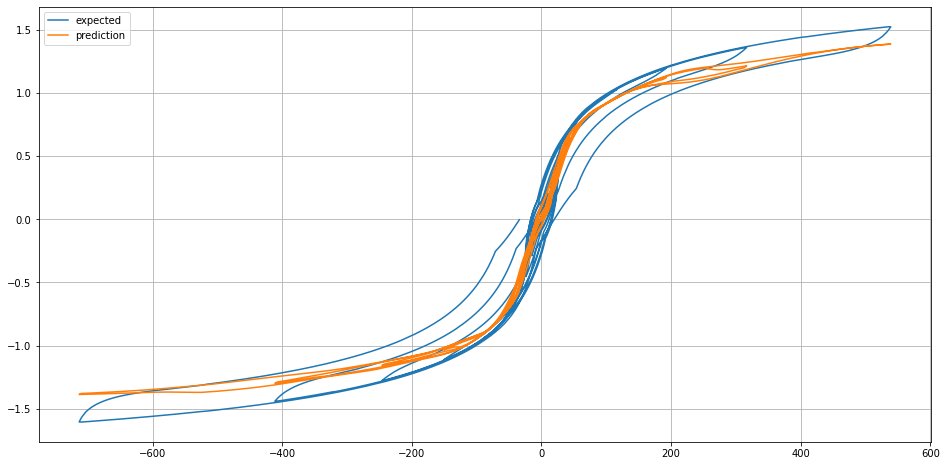

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(_20PNF1500_test_X[:, -1, 0], _20PNF1500_test_Y, label='expected')
plt.plot(_20PNF1500_test_X[:, -1, 0], pred, label='prediction')
plt.grid()
plt.legend()
plt.show()

# The End